# Week 2 - Probability

Version with **answers** to exercises.

<hr style="border:2px solid gray">
<a id='outline'></a>

# Outline
1. [Data Handling using Pandas](#section1)
1. [Pandas with Datasets on File](#section2)
1. [Basics of Probability](#section3)
1. [Probability Distributions](#section4)
1. [Monte Carlo methods of Data Generation](#section5)
1. [Exercises](#exercises)
1. [Further Exercises](#moreexercises)

We strongly recommend you find your copy of notes from the PHYS40005 Statistics and Measurement notes. 

<hr style="border:2px solid gray">
<a id='section1'></a>

# Section One: Data Handling using Pandas [^](#outline)

[**Pandas**](https://pandas.pydata.org/) is a well known and popular Python library for data manipulation, analysis and display. You will find a lot of help for pandas on the web. 

Pandas has a particular way of working that is distinct from traditional computer languages such as python but which echoes that used in other systems used for data manipulation and statistics, such as the [`R` language](https://en.wikipedia.org/wiki/R_(programming_language)). In particular, in pandas, we deal with objects known as "Series" and "**DataFrames**". 

* A Series is a labelled collection of data, similar to a dictionary. Each element can have a different data type. 
* A DataFrame is a 2D labelled data structure, where each column can have a different data type. Each row of a DataFrame can be thought of as a Series (and indeed, if you select a single row of a DataFrame it is returned as a Series). 

DataFrames are more useful and more commonly used, so we will focus our discussion just on DataFrames. 

## Creating a DataFrame

A DataFrame is a tabular data structure, similar to an Excel spreadsheet. The data is organised by rows and columns. These are labelled:
* Rows are labelled by an **index**
* Columns are labelled by **headers**

Data can be accessed according to the headers or the index. Instead of just being numerical indices, like you have with e.g. numpy arrays, these can be descriptive strings. As a result, you can access data in a descriptive way. 

The cell below shows a couple examples of how you can construct DataFrames.

In [1]:
import pandas as pd

# Method 1: Set data as dictionary structure. Data formatted in columns

data={'Name':["Rex","Bruno","Biffa","Queeny", "Bob", "Sheiba", "Crusoe"],
     'Breed':["bulldog","labrador","doberman","poodle", "pug", "labrador", "scotty"],
     'Age':[2,4,12,0.5, 7, 10, 7]}

dogs=pd.DataFrame(data)

display(dogs)

# Method 2: Splitting Headers and data. Data formatted in rows

d=[["Rex","bulldog",2],
    ["Bruno","labrador",4],
    ["Biffa", "doberman", 12],
    ["Queeny","poodle", 0.5],
    ["Bob", "pug", 7],
    ["Sheiba", "labrador", 10],
    ["Crusoe","scotty",7]]

Headers=['Name', 'Breed', 'Age']

dogs2=pd.DataFrame(data=d,columns=Headers)

display(dogs2)


,Name,Breed,Age
0,Rex,bulldog,2.0
1,Bruno,labrador,4.0
2,Biffa,doberman,12.0
3,Queeny,poodle,0.5
4,Bob,pug,7.0
5,Sheiba,labrador,10.0
6,Crusoe,scotty,7.0


,Name,Breed,Age
0,Rex,bulldog,2.0
1,Bruno,labrador,4.0
2,Biffa,doberman,12.0
3,Queeny,poodle,0.5
4,Bob,pug,7.0
5,Sheiba,labrador,10.0
6,Crusoe,scotty,7.0


The first column is the index. We can select data based on the header (`display` gives nicer formatting than `print`):

In [2]:
dogs.Name

0       Rex
1     Bruno
2     Biffa
3    Queeny
4       Bob
5    Sheiba
6    Crusoe
Name: Name, dtype: object


More generally you can use `[]` to select data, a bit like you do for slicing numpy arrays. 

* Passing a single label in `[]` to a DataFrame selects a column; `df['A']` is equivalent to `df.A`.
* Passing a slice in `[]` selects matching rows, e.g. `df[2:4]` gives you the rows matching the slice 2:4. 


In [3]:
display(dogs['Breed'])

display(dogs[2:4])


0     bulldog
1    labrador
2    doberman
3      poodle
4         pug
5    labrador
6      scotty
Name: Breed, dtype: object

,Name,Breed,Age
2,Biffa,doberman,12.0
3,Queeny,poodle,0.5


An alternative way to access data is through the `loc` and `iloc` methods, standing for location and integer location respectively. 

* `loc` takes headers or indices **as seen in the DataFrame**, e.g. if we had a non-numeric index we could use the labels in the index
* `iloc` takes numeric indices, like numpy arrays

For both methods, the syntax is the same:

* First argument specifies the desired row(s)
* Second argument specifices the desired column(s)

In [4]:
display(dogs.loc[0,:]) 

display(dogs.loc[:,'Breed'])

display(dogs.loc[2:4,:])

display(dogs.loc[:,['Breed','Age']])



Name         Rex
Breed    bulldog
Age          2.0
Name: 0, dtype: object

0     bulldog
1    labrador
2    doberman
3      poodle
4         pug
5    labrador
6      scotty
Name: Breed, dtype: object

,Name,Breed,Age
2,Biffa,doberman,12.0
3,Queeny,poodle,0.5
4,Bob,pug,7.0


,Breed,Age
0,bulldog,2.0
1,labrador,4.0
2,doberman,12.0
3,poodle,0.5
4,pug,7.0
5,labrador,10.0
6,scotty,7.0


You can add a new column or row to a DataFrame by indexing by the desired column name or row index, and setting it equal to a list of values equal to the number of rows/columns in the DataFrame.

In [5]:
dogs.loc[:,"Length"]=[50,100,105,85, 40,100,80]
dogs.loc[len(dogs)] = ['Daisy','papillon',3.5, 35]
display(dogs)


,Name,Breed,Age,Length
0,Rex,bulldog,2.0,50
1,Bruno,labrador,4.0,100
2,Biffa,doberman,12.0,105
3,Queeny,poodle,0.5,85
4,Bob,pug,7.0,40
5,Sheiba,labrador,10.0,100
6,Crusoe,scotty,7.0,80
7,Daisy,papillon,3.5,35


You can add new rows to a DataFrame, combining pandas objects using `concat`:

In [6]:
new_row = pd.DataFrame({'Name':'Ham','Breed':'shiba inu','Age':10,'Length':40},index = [len(dogs)])

dogs = pd.concat([dogs, new_row])
display(dogs)

,Name,Breed,Age,Length
0,Rex,bulldog,2.0,50
1,Bruno,labrador,4.0,100
2,Biffa,doberman,12.0,105
3,Queeny,poodle,0.5,85
4,Bob,pug,7.0,40
5,Sheiba,labrador,10.0,100
6,Crusoe,scotty,7.0,80
7,Daisy,papillon,3.5,35
8,Ham,shiba inu,10.0,40


Our default index here is just a numerical index; we can change it to something more useful, like the Name column. This way, someone can access all the data about a given dog by querying that index.

In [7]:
dogs = dogs.set_index('Name')

display(dogs)

display(dogs.loc['Biffa'])

print("--- Bob has length "+str(dogs.loc['Bob']['Length']) )

,Breed,Age,Length
Name,,,
Rex,bulldog,2.0,50
Bruno,labrador,4.0,100
Biffa,doberman,12.0,105
Queeny,poodle,0.5,85
Bob,pug,7.0,40
Sheiba,labrador,10.0,100
Crusoe,scotty,7.0,80
Daisy,papillon,3.5,35
Ham,shiba inu,10.0,40


Breed     doberman
Age           12.0
Length         105
Name: Biffa, dtype: object

--- Bob has length 40


You can also create columns that are combinations of other columns: 

In [8]:
dogs["combination"]=dogs.Age*dogs.Length
display(dogs)

,Breed,Age,Length,combination
Name,,,,
Rex,bulldog,2.0,50,100.0
Bruno,labrador,4.0,100,400.0
Biffa,doberman,12.0,105,1260.0
Queeny,poodle,0.5,85,42.5
Bob,pug,7.0,40,280.0
Sheiba,labrador,10.0,100,1000.0
Crusoe,scotty,7.0,80,560.0
Daisy,papillon,3.5,35,122.5
Ham,shiba inu,10.0,40,400.0


## Manipulation of DataFrames

There are many ways you can sort and filter DataFrames to find the information you want. You can do simple indexing like you might with numpy arrays:



In [9]:
display(dogs[dogs.Age > 6])

,Breed,Age,Length,combination
Name,,,,
Biffa,doberman,12.0,105,1260.0
Bob,pug,7.0,40,280.0
Sheiba,labrador,10.0,100,1000.0
Crusoe,scotty,7.0,80,560.0
Ham,shiba inu,10.0,40,400.0


You can find a lot of information about how you can slice and query for data, as well as adding new data to your DataFrames, in the pandas [User Guide](https://pandas.pydata.org/docs/user_guide/index.html). A good place to get started is the [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html) guide.

<div style="background-color:#C2F5DD">

### Exercise 1

Using the dogs DataFrame we defined in Section Three, try the following operations:

* Define a new column for with the header "Weight"; make up some data of your own to put in this column
* Make up some data for another dog, and add it to the DataFrame. Remember: we have set the index of the DataFrame to be the name, so the DataFrame you define for the new dog must have its name as its index.
* Define a column that is the weight per unit length
* Calculate the mean and standard deviation of each of the numeric quantities

In [10]:
# Add a column for Weight, 

# Surely weight is proportional to volume which is roughly proportional to (length)^3? 
# Typical male doberman weight is 40kg
# This is over complicated! Any numbers will do for this example
dogs["weight"] = 40.0 * (dogs.Length / dogs.loc['Biffa','Length'])**3
display(dogs)


,Breed,Age,Length,combination,weight
Name,,,,,
Rex,bulldog,2.0,50,100.0,4.319188
Bruno,labrador,4.0,100,400.0,34.553504
Biffa,doberman,12.0,105,1260.0,40.000000
Queeny,poodle,0.5,85,42.5,21.220171
Bob,pug,7.0,40,280.0,2.211424
Sheiba,labrador,10.0,100,1000.0,34.553504
Crusoe,scotty,7.0,80,560.0,17.691394
Daisy,papillon,3.5,35,122.5,1.481481
Ham,shiba inu,10.0,40,400.0,2.211424


In [11]:
# Add data for another dog

# Typical length of Great Dane is 100cm
# Remember that we have changed the data frame since our first example of how to add a row
# so we need to change the input dictionary and use a Name as the index of the new row.
# For instance in this answer the 'combination' entry is not defined  in this input
# so Scooby Doo will have a "NaN" ("not a number") value there .

new_row = pd.DataFrame({'weight': 100.0, 'Breed': 'great dane', 'Age':9, 'Length':100}, index = ['Scooby Doo'])
dogs = pd.concat([dogs, new_row])
display(dogs)


# If you just copied from the earlier example you will get a mess e.g. if you tried this:-
#    new_row_bad = pd.DataFrame({'Name':'Scooby Doo','Breed':'great dane','Age':9,'Length':100},index = [len(dogs)])
# This new_row_bad would generate a new row but the index would be a number 
# while the 'Name' entry in this dictionary now generates a new column where all previous dogs get Nan values 



,Breed,Age,Length,combination,weight
Rex,bulldog,2.0,50,100.0,4.319188
Bruno,labrador,4.0,100,400.0,34.553504
Biffa,doberman,12.0,105,1260.0,40.000000
Queeny,poodle,0.5,85,42.5,21.220171
Bob,pug,7.0,40,280.0,2.211424
Sheiba,labrador,10.0,100,1000.0,34.553504
Crusoe,scotty,7.0,80,560.0,17.691394
Daisy,papillon,3.5,35,122.5,1.481481
Ham,shiba inu,10.0,40,400.0,2.211424
Scooby Doo,great dane,9.0,100,NaN,100.000000


In [12]:
# Define a weight per unit length column

dogs["W/L"]=dogs.weight/dogs.Length
display(dogs)


,Breed,Age,Length,combination,weight,W/L
Rex,bulldog,2.0,50,100.0,4.319188,0.086384
Bruno,labrador,4.0,100,400.0,34.553504,0.345535
Biffa,doberman,12.0,105,1260.0,40.000000,0.380952
Queeny,poodle,0.5,85,42.5,21.220171,0.249649
Bob,pug,7.0,40,280.0,2.211424,0.055286
Sheiba,labrador,10.0,100,1000.0,34.553504,0.345535
Crusoe,scotty,7.0,80,560.0,17.691394,0.221142
Daisy,papillon,3.5,35,122.5,1.481481,0.042328
Ham,shiba inu,10.0,40,400.0,2.211424,0.055286
Scooby Doo,great dane,9.0,100,NaN,100.000000,1.000000


In [13]:
dogs.columns.tolist()

['Breed', 'Age', 'Length', 'combination', 'weight', 'W/L']

In [14]:
# Calculate the mean and standard deviation for each of the numeric quantities

print("Simple way to get mean of the age of dogs, which equals {:5.2f}, and the std. dev. {:5.2f}".format(dogs.Age.mean(),dogs.Age.std()))

# Here is a way to do everything at once but here probably quicker to cut and paste then change the column label used by hand

# This gives a list of column labels
display(dogs.columns.tolist())

# So loop through but deal with failure when non numerical values are accessed
for column_label in dogs.columns.tolist():
    try:
        print("{:12s}: Mean = {:6.2f}, std.dev. = {:6.2f}".format(column_label,dogs.loc[:,column_label].mean(), dogs.loc[:,column_label].std() ))
    except:
        # We expect columns which are not numerical to fail but don't let that stop the loop
        pass


Simple way to get mean of the age of dogs, which equals  6.50, and the std. dev.  3.84


['Breed', 'Age', 'Length', 'combination', 'weight', 'W/L']

Age         : Mean =   6.50, std.dev. =   3.84
Length      : Mean =  73.50, std.dev. =  28.97
combination : Mean = 462.78, std.dev. = 418.17
weight      : Mean =  25.82, std.dev. =  30.02
W/L         : Mean =   0.28, std.dev. =   0.29


<div style="background-color:#C2F5DD">

End of Exercise 1

### Summary

In this section, we have covered some basics of `pandas`, a very useful data library in Python. This has included:

* Defining a DataFrame
* Printing the contents of a DataFrame in a nice way
* Finding slices of a DataFrame
* Adding new rows and columns to a DataFrame

The following section will some more advanced techniques using pandas, including reading and writing DataFrames to and from files. 

<hr style="border:2px solid gray"> 
<a id='section4'></a>

## Section Two: Pandas with Datasets on File  [^](#outline)

So far we have dealt with a very simple DataFrame that we have defined ourselves, to demonstrate how you can add data to an existing DataFrame. In reality, the main use of pandas is for big DataFrames, and handling a lot of data at once. Typically these will be stored in a file. You can save pandas DataFrames in a number of different ways, such as:
* Excel spreadsheets
* csv files
* JSON files

and more. The full list of input/output functions can be found in [the documentation](https://pandas.pydata.org/docs/reference/io.html), but here we will deal with a file saved in an .csv file. First, we load the file.

In [15]:
concrete_data = pd.read_csv('concrete_data.csv')
display(concrete_data)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


As you can see, this dataset has more than 1000 entries, with 9 columns per entry. This dataset is a sample machine learning dataset from the UC Irvine Machine Learning Repository, and can be found [here](https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength). It can be used to test machine learning methods to predict the compressive strength of concrete, from the age of the concrete and ingredients used to make it. 

Column units are as follows:
* First 7 columns (Cement to Fine Aggregate): $\text{kg m}^{-3}$. Note this is not density, but the weight of the relevant ingredient in a $\text{m}^3$ mixture of that concrete sample.
* Age: days
* Strength: MPa





We can directly do plotting from Pandas, e.g. plotting the Cement content against the concrete strength:

<Axes: xlabel='Cement', ylabel='Strength'>

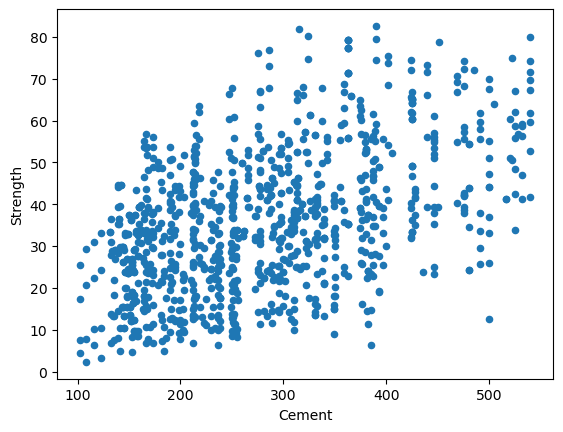

In [16]:
concrete_data.plot(x='Cement',y = 'Strength',kind='scatter')

Or we can plot a histogram of the cement content:


array([[<Axes: title={'center': 'Cement'}>]], dtype=object)

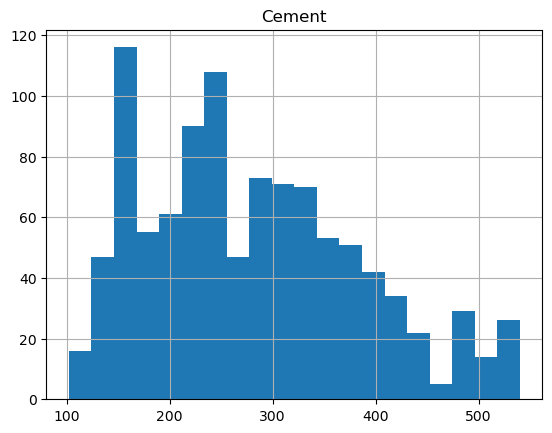

In [17]:
concrete_data.hist('Cement',bins = 20)

These are very basic plots that you can produce quickly to explore a dataset. Later in this workbook you will see how we can produce clear and professional plots. 

There are lots of options for visualisation from Pandas DataFrames directly that we don't have the time to cover in detail here, see [the documentation](https://pandas.pydata.org/docs/user_guide/visualization.html) for further details.

<div style="background-color:#C2F5DD">

### Exercise 2

Use some of the pandas plotting methods to visualise some of the data from our dogs DataFrame in the previous section. Try:

* Scatter plot of one quantity against another
* Histogram of one of the quantities

<Axes: xlabel='Water', ylabel='Strength'>

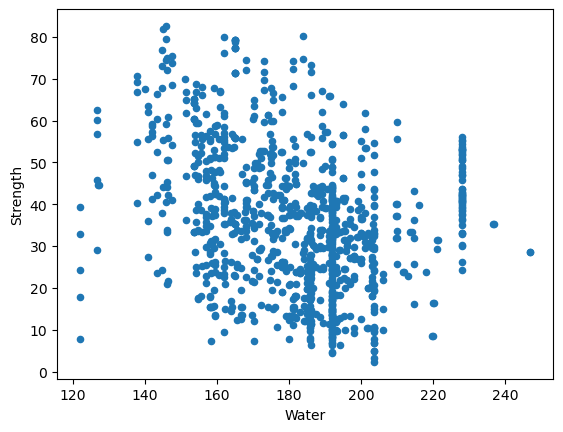

In [18]:
# Scatter plot code

concrete_data.plot(x='Water',y = 'Strength',kind='scatter')


array([[<Axes: title={'center': 'Strength'}>]], dtype=object)

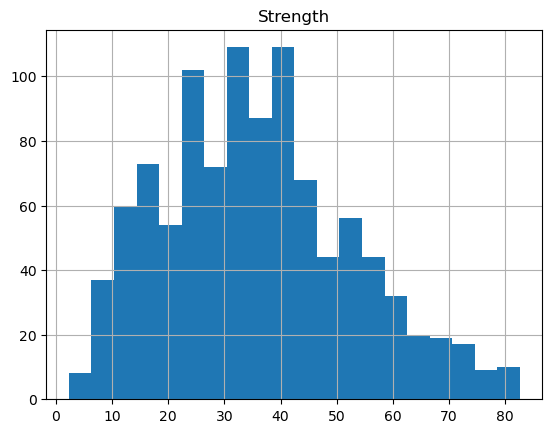

In [19]:
# Histogram code

concrete_data.hist('Strength',bins = 20)


<div style="background-color:#C2F5DD">

End of exercise 2

Say we wanted to look for concrete samples with a Water content of greater than 100 $\text{kg m}^{-3}$, but an age of less than 100 days. We can index in a boolean fashion, as described before, or use `query`. `query` performs the same actions as indexing with a boolean condition, but is slightly faster due to the specific implementation. This is only generally noticeable for large DataFrames, but it is good practise in general. 

In [20]:
display(concrete_data.query('Water > 100 and Age < 100'))

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In general, `query` is very powerful and a useful tool for filtering and selecting data. It returns a DataFrame consisting of the rows of the original DataFrame that satisfy the boolean condition(s) passed. Read more in [the documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html).

<div style="background-color:#C2F5DD">

### Exercise 3

Using `query`, find concrete samples less than 30 days old and plot a histogram of the Strength, using 20 bins.

 There are 749 entries with age under 30
 There are 749 entries with age under 30


array([[<Axes: title={'center': 'Strength'}>]], dtype=object)

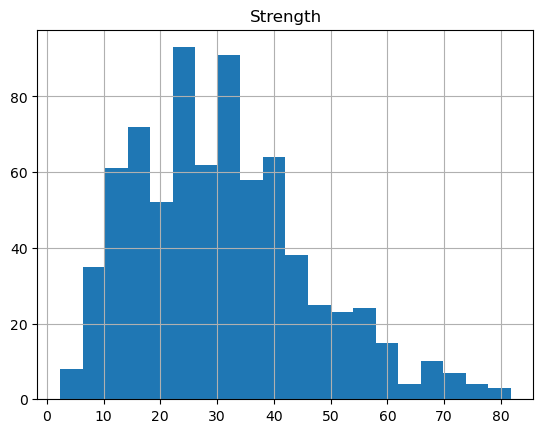

In [21]:
# As an example I print the number of rows selected by the query

print(" There are {} entries with age under 30".format( len( concrete_data.query('Age < 30') ) ) )

# You might see another way to do online this but it is harder to read
print(" There are {} entries with age under 30".format( len( concrete_data.loc[ concrete_data['Age']< 30 ]  ) ) )

# The histogram
concrete_data.query('Age < 30').hist('Strength',bins = 20)


<div style="background-color:#C2F5DD">

End of exercise 3

One other very useful way to filter data is `groupby`
* You can group by values in one column
* Useful for datasets with categorical or discrete data in at least one column
* Useful to process different data sets in one DataFrame quickly

For example, with our concrete data we could group by the age and find the mean and standard deviation of the strength.

In [22]:
means = concrete_data.groupby('Age')['Strength'].mean()
stds = concrete_data.groupby('Age')['Strength'].std()

display(means)
display(stds)

Age
1       9.455000
3      18.981194
7      26.050873
14     28.750968
28     36.748612
56     51.890220
90     40.480370
91     69.808636
100    47.668846
120    39.646667
180    41.730385
270    51.272308
360    40.696667
365    43.557857
Name: Strength, dtype: float64

Age
1       4.504270
3       9.863047
7      14.583447
14      8.638029
28     14.711077
56     14.308545
90      9.819174
91      7.697465
100     8.401673
120     1.104415
180    10.929097
270    10.644833
360     4.171439
365     9.620081
Name: Strength, dtype: float64

`groupby` is especially useful when you have a complex operation that you want to apply to different groups of data separately, but still quickly. 

You can define your own function to use in `groupby` as well. This is beyond the scope of this course but you can find more details about `groupby` in [the documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html).

We can find some useful summary statistics for each column using `describe`. This gives us the following statistics per column:

* `count`: the number of entries in that column
* `mean`: the mean value 
* `std`: the standard deviation 
* `min`: the minimum value
* `25%`: the lower quartile value
* `50%`: the median value
* `75%`: the upper quartile value
* `max`: the maximum value

In [23]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


We can add a new column that is the sum of the total ingredients in each concrete sample, by summing the ingredient columns:

In [24]:
concrete_data['Ingredient Total'] = concrete_data.loc[:,['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate']].sum(axis = 1)

Finally, we can save our updated data to a new Excel spreadsheet. 

In [25]:
concrete_data.to_excel('concrete_data_new.xlsx')

<div style="background-color: #FFF8C6">

When we save structured data such as DataFrames or dictionaries to file, we must undergo a process called **data serialisation**. You don't in general need to know how this works, just that there are different methods. In Python, the default method is using the **pickle** module; if you ever save a dictionary to a .npy file using numpy, it implicitly uses pickle. This process is referred to as pickling the data. In several places you will be given data saved to a .npy file that is contained within a dictionary. To access this data, you will need the following call signature:

`data = np.load('file/name',allow_pickle = True).item()`

### Summary

In this section we have seen some more pandas syntax, including: 

* loading and saving DataFrames from and to .csv files
* querying DataFrames to use multiple Boolean conditions
* Grouping data and finding summary statistics of each group
* Finding total summary statistics of our dataset

The following section will discuss how you can use `matplotlib` make good, clear plots of your data.

<hr style="border:2px solid gray"> 
<a id='section5'></a>

# Section Three: Basics of Probability [^](#outline)

This section is a recap of some basics of probability.

## What is probability?

You should already have an intuition as to what probability means. The fundamental mathematical formulation of probability doesn't assign a meaning to probability but starts with the three "Kolmogorov axioms":

* The probability $P(X_i)$ that an event $X_i$ occurs should be non-negative, $P(X_i) \geq 0$. 
* The probability $P(X_i \text{ or } X_j)$ that either one of two distinct events $X_i$ and $X_j$ occurs is simply the sum of the probability of each individual event occuring, that is  $P(X_i \text{ or } X_j)$ = $P(X_i)$ + $P(X_j)$
* The sum over all probabilities, the probabilit of some event occuring, is one, $\sum_\Omega P(X_i)$ = 1

Here $\Omega$ denotes the set of all possible outcomes and is known as the **sample space**. For instance, here the events could be the result obtained when we roll one six-sided die, so $X_i$ is the event where the die shows the number $i$.

These axioms do not place many restrictions on probability, but to do anything particularly meaningful we need to choose a specific interpretation. You will have seen the two different interpretations used in the physical sciences before.

## Frequentist probability

**Frequentist probability** is related to the frequency with which events occur in repeated trials:

* Consider an experiment with multiple possible outcomes, where one outcome $X$ is desired
* For $N$ measurements, the desired outcome $X$ is observed $n$ times
* The probability that any single event of the $N$ events is given by the limit of the ratio

\begin{equation*}
P(X) = \lim_{N\to\infty}\frac{n}{N}
\end{equation*}

There is a clear limitation to this approach: it can only be applied when the experiment can be repeated. However, this probability is independent of any biases, so long as the outcome X is agreed to be the same between different people. 

## Bayesian probability

**Bayesian probability** abandons the concept of frequency, and instead defines probability as something that can be applied to non-repeatable experiments.

* Bayesian probability is based on *degree of belief* in some event $X$ occurring, i.e. how likely you think something is to happen
* For example, if you see betting odds that say the odds of $X$ occuring are 4:1, you might assign a probability of X occurring P(X) = 1/(1 + 4) = 1/5

An observer's estimation of Bayesian probability depends on the observer and the state of the time of observation. As we see the system change, an observer may update their value of $P(X)$ as they gain more information. In this way we can also see Bayesian probability as a statement of knowledge. Some other points of Bayesian probability:

* This is subjective; depending on what the observer knows, they might assign a different probability to an event $X$.
* Can be used for events where we cannot repeat the experiment, but have some intuition or guess as to what the probability is.


## Properties of probability and Bayes theorem

Here we will recap some simple properties of probability, and Bayes theorem.

Consier now two events $A$ and $B$ both of which can happen together. For instance $A$ maybe the event where you friend arrives at the lecture wearing black shoes and $B$ might be the event where your friend is wearing a red jumper.  We define the probability of each event as $P(A)$ and $P(B)$ respectively. 

We need some notation:-
* $P(A\text{ and }B)$ denotes the probability of both event $A$ and event $B$ occuring,
* $P(A\text{ or }B)$ denotes the probability of either event $A$ or event $B$ occuring but not both,
* $P(A|B)$ refers to the **conditional probability** of event $A$ occuring given that event $B$ has already occured. 

For instance, if our friend has called befroe they arrive in the lecture theatre and mentioned they have their red jumper on, then $P(A|B)$ tells us teh probability that you will see them wearing black shoes they arrive in the lecture theatre.

Given this notation and definitions, we then have that the following conditions are true:

* $P(A\text{ or }B) = P(A) + P(B) - P(A\text{ and }B)$,
* $P(A\text{ and }B) = P(A|B)P(B) = P(B|A)P(A)$.

### Independent Events

It is always good to consider the very special case where two different events are **independent**. That is the probability of $B$ happening does not depend on what happens for event $A$. 

For instance, the probability a Geiger counter clicks (or not) at a particular time $t_A$ (event $A$) is independent of whether it clicks (or not) at a different time $t_B$ (event $B$). Radioactive decay of one nuclei happens independently of all other nuclei in a radioactive material. On the other hand, surely the probability that tennis player Novak Djokovic wins the French open in June should be influenced by his success (or not) at the Australian open in January.

The case of statistical independence is often used as a simple baseline (sometimes called a *null model*) used in a comparison to help us see if our data has something "interesting" happening. For instance maybe it is mostly luck for a tennis player to win any one tournament, i.e. a simple roll of the tennis dice, each one independent of another.  We could use the statistical independence hypothesis to compare against actual data on results (see hypothesis testing next week but not for the answer to sports questions).    

For two independent events $A$ and $B$, we know that probability of event $A$ if we know that event $B$ has occurred, that is the conditional probability $P(A|B)$ is simply $P(A|B) = P(A)$. As a result, for independent $A$ and $B$:
* $P(A\text{ and }B)$ = $P(A)P(B)$.

<div style="background-color:#FFCCCB">

**Bayes theorem** is a very important theorem that allows us to update our estimation of probability of events. It relates the conditional probabilities for $A$ and $B$:

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
\end{equation*}

Bayesian statistics makes more particular use of this theorem, for updating belief in parameters. We can think about this in terms of **hypotheses**:

* Consider a hypothesis $H(\theta = \theta_i)$ that the parameter $\theta$ is equal to a specific value $\theta$
* In Bayesian probability, $P(\theta_i)$ represents the degree of belief in this hypothesis
* For frequentists, $\theta_i$ is not a random variable so cannot have a probability assigned to it
* Bayesian probability says we can apply Bayes theorem to this hypothesis, after making a set of observations $\mathbf{X}$ = $\{X_0, X_1, \cdots\}$; this gives us

\begin{equation*}
P(\theta_i|\mathbf{X}) = P(\mathbf{X}|\theta_i)\frac{P(\theta_i)}{P(\mathbf{X})},
\end{equation*}

where:

* $P(\mathbf{X})$ is the probability of observing the data, summed over all possible values of $\theta$. This is known as the **marginal probability** or the **evidence**.
* $P(\theta_i)$ is your initial probability for the parameter $\theta$ = $\theta_i$, the belief in your hypothesis. This is known as your **prior**.
* $P(\mathbf{X}|\theta_i)$ is the probability of measuring your data, given the parameter $\theta$ is equal to $\theta_i$. This is known as the **likelihood**. 
* $P(\theta_i|\mathbf{X})$ is the probability that $\theta$ = $\theta_i$, given the evidence $\mathbf{X}$. This is known as the **posterior**.

Bayes theorem allows us to update our belief in a given hypothesis based on evidence. You can also use it multiple times consecutively; consider a second set of observations $\mathbf{Y} = \{Y_0, Y_1, \cdots\}$. We can calculate a new posterior using Bayes theorem again:

\begin{equation*}
P(\theta_i|\mathbf{X},\mathbf{Y}) = P(\mathbf{Y}|\theta_i)\frac{P(\theta_i|\mathbf{X})}{P(\mathbf{Y})}
\end{equation*}

Here you can see we have substituted our previous posterior as our prior for this calculation. In this way we can incorporate new data into our degree of confidence in our hypothesis as we obtain more data. Later in this notebook we will use Bayes theorem to solve the famous Monty Hall problem, and compare it to a frequentist probability found by running a simulation of the game.

---
## Summary

In this section, we have reviewed some basics of probability, including:

* Frequentist and Bayesian interpretations
* Kolmogorov axioms
* Bayes theorem

In the following section, we will discuss different probability distributions.



<hr style="border:2px solid gray">
<a id='section2'></a>

# Section Four: Probability Distributions [^](#outline)

In experimental physics, you will often see random variables. For instance, quantum processes are by their nature probabilistic so we need probability distributions to describe results for radioactivity or fundamental particle interactions in CERN experiments. We therefore expect to encounter random variables in what we measure. 

There are two variations to consider: **discrete** valued results and **continuous** values results. Counting the number of radioactive counts in 1 minute is a discrete valued measurement. Asking about the time interval between succesive counts on a Geiger counter is a continuous valued meaurement. The principles are the same for both cases but the notation and mathematics are slightly different. 

In practice, we can never record a continuous variable exactly. At best, our measurements have limited resolution e.g. we may only be able to time clicks to the nearest microsecond because of the frequency at which our digital kit works at. The energy and momentum of a particel at CERN may only be known to a few percent. So it is common to analyse continuous data in terms of **bins**.  That is we might record the number of events at CERN that have energy between 125GeV and 125.5GeV, one "bin" in energy if our energy resolution is 0.1 GeV. Now the energy of each particle is a discrete value as we are working in terms of the energy bins. So even with continuous variables we may decide to analyse them in terms of discrete statistics.

## Discrete Probability Distributions

A **discrete probability distribution** describes how likely it is to find a given value for a random variable $X$ where $X$ is discrete, usually an integer.

More formally, for a random variable $X$ with possible values in some **sample space** $\Omega$, the corresponding probabilities $P(X)_\Omega$ form a **probability distribution**. This is the distribution of probability for all possible values of the random variable $X$. 

Note that when dealing with discrete valued random variables $X$ as here, the probability distribution $P(X)$ is formally referred to as a 
[**probability mass function**](https://en.wikipedia.org/wiki/Probability_mass_function). This is the language used in many libraries such as `scipy.stats` used below where `pmf` is used to refer to the library function that returns $P(X)$ values, e.g. `scipy.stats.binom.pmf(k,n,p)` for the probability distribution of the binomial distribution. 

As the possible values $X$ are discrete, such as the result of rolling a die, we require that the sum of probabilities is one, i.e. $\sum_{X \in \Omega} P(X) = 1$.  

An intuitive example of a probability distribution can be seen by considering rolling a standard six-sided die  (one die, many dice). We can break this down as follows:

* The sample space is $\Omega$ = $\{1, 2, 3, 4, 5, 6\}$,
* $P(X)$ = 1/6 for any possible outcome $X \in \Omega$ (assuming our die is unbiased).

When we roll the die a single time, we are making a random draw from this probability distribution. As we roll the die more times and record the results, we should record a distribution of values whose frequency converges to a discrete uniform distribution .

<!--  $U$ which will express as $X \sim U(1, 6)$. A plot of this distribution can be seen in the figure below. SURELY THIS NOTATION IS FOR CONTINUOUS UNIFORM DISTRIBUTIONS 
In general, for a random variable $X$ distributed according to some uniform distribution $X \sim U(a, b)$, we mean that X can take any values between $a$ and $b$ with equal probability. -->

<img src='Week2_plots/one_die_distribution.png' align='center' width=600>

*Probability distribution for the results of rolling one unbiased six-sided die. Each outcome is equally likely.*

Of course, probabilities do not have to be even in a probability distribution, and in general they are not. Consider rolling two standard, unbiased six-sided dice and adding the results. There is only one way to get the result of a 2 (rolling a 1 on both dice), but you can get the result of 3 in two different ways (rolling 1 and 2, or rolling 2 and 1). You can work this out for each possible value of the sum, and you find the distribution shown below.

<img src='Week2_plots/two_dice_distribution_final.png' align='center' width=600>

*Probability distribution for the results of rolling two unbiased six-sided dice and summing the results. The most likely outcome is 7.*

<div style="background-color: #FFF8C6">

The uniform distribution is often important for Bayesian statistics, as if you have no physical model that informs your choice of prior distribution then assuming all values of the random variable are equally likely is typically the default. In this way, we can see this assumption as a statement of knowledge - if we know nothing about how a variable is distributed, it makes sense to assume all outcomes are equally likely until evidence proves otherwise.

The example given here is a discrete probability distribution. We will talk about continuous probability distributions shortly.

### Cumulative distribution

We can also define a **cumulative distribution**, which allows us to find the probability of our random variable being equal to or less than some value. We will from here onwards denote probability distributions and cumulative distributions using lower-case symbols and upper-case symbols respectively, say $f$ and $F$ respectively. 

Consider a random variable $X$ that takes values $\{X_1, X_2, \cdots, X_N\}$. Let this random variable be distributed according to some probability distribution D with parameter $\theta$, such that $X \sim D(\theta)$. We can write the probability of measuring a value $x$ of this random variable as

\begin{equation*}
f(x; \theta) = P(X = x)
\end{equation*}

The cumulative distribution $F_X(x; \theta)$ tells us the probability that $X$ is less than or equal to $x$. For our distribution $f(X; \theta)$, this is therefore given as:

\begin{equation*}
F(x; \theta) = P(X \leq x) = \sum_{X_i \leq x}P(X = X_i) = \sum_{X_i \leq x}f(X_i; \theta)
\end{equation*}

## Continuous probability distributions
Of course we do not only encounter discrete random variables in experimental physics; indeed, many of the quantities measured e.g. in particle physics are continuous, such as energy or momentum. When considering values on a continuous scale, it does not make sense to consider defining a probability for a single value; instead, we must define a **probability density function**. For some random variable $X$ with probability density function $f(X)$, the *probability* of a value of $X$ between $a$ and $b$ is given by

\begin{equation*}
P(a \leq X \leq b) = \int_a^b f(X) \, dX
\end{equation*}

As before, the probability density function must be normalised; this therefore requires that 

\begin{equation*}
\int_\Omega f(X)dX = 1,\quad\,\, \text{where}\,\, X \in \Omega.
\end{equation*}

Note that whereas for a discrete random variable we summed over the probabilities the sample space $\Omega$ (i.e. sum over each of the possible values of $X$), for a continuous random variable we must integrate the probability *density* over the sample space $\Omega$. You can think of $f(X) \, dX$ as an infinitesimal probability $dP$, the probability that we find an event between $X$ and $X+dX$.  

We also define a cumulative distribution function $F(X)$ that as before defines the probability of measuring a value of $X$ less than or equal to some value $x$. (So this is a probability not a probability density).

\begin{equation*}
F(X) = \int_{X_a}^X f(X^\prime) \, dX^\prime,
\end{equation*}

where $X_a \leq X \leq X_b$ and $X_a$ and $X_b$ are the lower and upper bounds of the sample space $\Omega$ respectively. This has particular use later when we discuss hypothesis testing.

Consider a random variable $X$ distributed according to the following probability density function:

\begin{equation*}
f(X) = \frac{3}{2\cdot5^3}X^2, \quad -5 \leq X \leq 5,
\end{equation*}
where the factor $\frac{3}{2\cdot 5^3}$ is a normalisation factor such that $\int_{-5}^5f(X) dX = 1$. This probability density function can be seen in the figure below.

<img src='Week2_plots/continuous_pdf_example.png' align='center' width=600>

*Continous probability density function $\mathit{f(X) = X^2}$ for $\mathit{-5 \leq X \leq 5}$. The distribution is normalised to integrate to 1 as required.* 

We can similarly define the CDF for this distribution, as

\begin{equation*}
F(X) = \int_{-5}^X f(X^\prime)dX^\prime = \int_{-5}^X \frac{3}{2\cdot 5^3}{X^\prime}^2 dX^\prime = \frac{X^3}{2\cdot5^3} + \frac{1}{2}, \quad -5 \leq X \leq 5
\end{equation*}

We can see this CDF behaves as expected; for the minimum value $X = -5$, $F(X = -5) = 0$, and for the maximum value $X = 5$, $F(X = 5) = 1$. This CDF is plotted in the figure below.

<img src='Week2_plots/continuous_cdf_example.png' align='center' width = 600>

*CDF of the previously shown probability distribution.*


## Multivariate probability distributions

As well as probability distributions for single random variables, we can have probability distributions that describe more than one random variable. We can denote the **joint probability density function** for two random variables $X$ and $Y$ as $f(X,Y)$. That is the probability of finding values for one random variable between $X$ and $X+dX$ and at the same time finding a different variable taking values between $Y$ and $Y+dY$ is $f(X,Y)dXdY$.

If we want to find the probability density of one of these variables independent of the other, we want to calculate what is called a **marginal density**. If the random variable $Y$ lies between $Y_a \leq Y \leq Y_b$ then marginal probability density for $X$ is defined as
$$
g(X) = \int_{Y_a}^{Y_b}f(X,Y)dY,
$$
where $g(X)$ is the marginal density for random variable $X$. That is $g(X)dX$ is the probability of finding the random variable $X$ lying between $X$ and $X+dX$ regardless of the value of the second random variable $Y$. 

For independent random variables $X$ and $Y$, the joint probability density function $f(X,Y)$ is just the product of the individual probability density functions $f(X)$ and $g(Y)$.

<div style="background-color:#FFCCCB">

## Moments of probability distributions

For both discrete and continuous probability distributions, we can use the distribution f(X) to obtain useful information about a particular random variable or a function of random variables. 

#### Expectation values
    
The **expectation** of a random variable $X$ under a distribution $f(X)$ is given by
\begin{align*}
E[X] &= \sum_\Omega Xf(X), \quad \text{for discrete f(X)} \\
E[X] &= \int_\Omega Xf(X) dX, \quad \text{for continuous f(X)}
\end{align*}
where in both cases $\Omega$ denotes the space of possible values of $X$ under the distribution $f(X)$. 

This is also referred to as the **mean value** of a random variable $X$. The same formula can be applied to any function of a random variable; for a function $g(X)$, the expectation of this function under the distribution $f(X)$ is given as 

\begin{equation*}
E[g] = \int_\Omega g(X)f(X) dX
\end{equation*}

#### Moments of a distribution
    
The mean is often referred to as the **first moment** of the distribution of $X$; we can define higher moments as well. Usually when we refere to the **$n$-th moment** $\mu_n$ of a distribution we mean the expectation value of $X^n$, i.e. $E[X^n]$. However there are various different moments based on various polynomials of $n$  
\begin{align*}
\mu_n &= E[X^n]\quad\text{is the }n^{th}\text{ algebraic moment,}\\
\nu_n &= E[(X - E[X])^n]\quad\text{is the }n^{th}\text{ central moment,}\\
\lambda_n &= E[X(X-1)(X-2) \ldots (X-n+1)]\quad\text{is the }n^{th}\text{ factorial moment.}   
\end{align*}
From this we can see that the mean is the first algebraic moment $\mu_1$. You will be familiar with the variance of data, which is defined as the expectation of the function $g(X) = (X - E[X])^2$ and this is just the second central moment $\nu_2$. 

You may have heard of other descriptors of probability distributions such as **skewness** and **kurtosis**, which are derived from the third and fourth moments respectively. 

#### Covariance    
    
We can also define moments for multi-dimensional distributions. For example, for a joint probability distribution $f(X,Y)$, the algebraic moment of order $m$ in $X$ and order $n$ in $Y$ can be written as $\mu_{mn} = E[X^mY^n]$. 

The most commonly reelvant moment for multidimensional distributions is the **covariance**. 

* Consider a collection of $M$ random variables $\mathbf{X} = \{X_1,\cdots X_M\}$
* The covariance between variables $X_i$ and $X_j$ is the central moment of order 1 in $X_i$ and $X_j$ and order 0 for the remaining $M - 2$ variables:

\begin{equation*}
\text{covariance}(X_i,X_j) = \nu^{ij}_{1,1} = E[(X_i - E[X_i])(X_j-E[X_j])]
\end{equation*}

The covariance gives us an idea of how dependent on one another two random variables are, specifically how much variance in one variable affects the other variable. We can then define the correlation between the random variables $X_i$ and $X_j$ as

\begin{equation*}
\text{correlation}(X_i,X_j) = \frac{\nu^{ij}_{1.1}}{\sqrt{\nu_2^i\nu_2^j}},
\end{equation*}
where $\nu_2^i$ and $\nu_2^j$ are the variance of $X_i$ and $X_j$ respectively. The value of the correlation coefficient will be between -1 and 1; a value of 1 indicates the two variables are perfectly correlated, a value of -1 indicates they are perfectly anti-correlated, whereas a value of 0 indicates the two variables are **uncorrelated**.

If two random variables are independent, then the corresponding correlation coefficient is equal to 0 and the variables are uncorrelated. However, while in general independence implies the variables are uncorrelated, uncorrelated variables are not necessarily independent. 



## Common probability distributions

The next sections will cover three of the most common probability distributions. All of these are covered in the PHYS40005 Statistics Of Measurement course so check your notes from that course. We will also discuss another distribution, chi square ($\chi^2$) which is related to Gaussian distributions and used in goodness-of-fit tests as we shall see in week 3.

## Binomial distribution

You have seen the Binomial distribution before; this is a discrete probability distribution for modelling random variables with a binary outcome, i.e. one of two possible values. We can use this distribution to predict the number of successes $k$ in a number of independent trials (attempts) $n$, where the probability of success for any one trial is $p$. We can write this distribution as:
\begin{equation*}
f(k; n, p) = {n \choose k}p^k (1-p)^{n-k},
\end{equation*}
where:
* $k$ is the number of successes,
* $n$ is the number of trials,
* $p$ is the probability of success, so $(1 - p)$ is the probability of failure,
* ${n \choose k} = \frac{n!}{k!(n - k)!}$, known as the "binomial coefficient".

The Binomial distribution is sometimes denoted as $B(n,p)$.

It can be shown that the expectation $\langle k \rangle$ and variance $\sigma^2$ of a binomially distributed variable with $n$ trials and probability of success $p$ are equal to $np$ and $np(1-p)$ respectively, although the proof is not shown in this course.
\begin{align*}
\langle k \rangle &= \sum_{k=0}^n k f(k;n,p) = n\, p
\, , \\
\sigma^2 &= \langle k^2 \rangle -(\langle k \rangle)^2 
         = \sum_{k=0}^n (k-\langle k \rangle)^2 f(k;n,p) = n\, p \, (1-p) \, .
\end{align*}

The cumulative distribution $F(k; n, p)$ gives the probability of finding $k$ or fewer successes, and it is given by:

\begin{equation*}
F(k; n, p) = \sum_{i = 0}^k f(k;n,p) = \sum_{i = 0}^k {n \choose k}p^k (1-p)^{n-k}
\end{equation*}

This is not a particularly simple function (the "incomplete normalised Beta function" if you must know). 


This distribution is implemented in `scipy.stats`. It is easy to plot the probability distribution `scipy.stats.binom.pmf(k,n,p)` and the cumulative distribution `scipy.stats.binom.cdf(k,n,p)` for a range of values of $k$ for given $n$ and $p$:

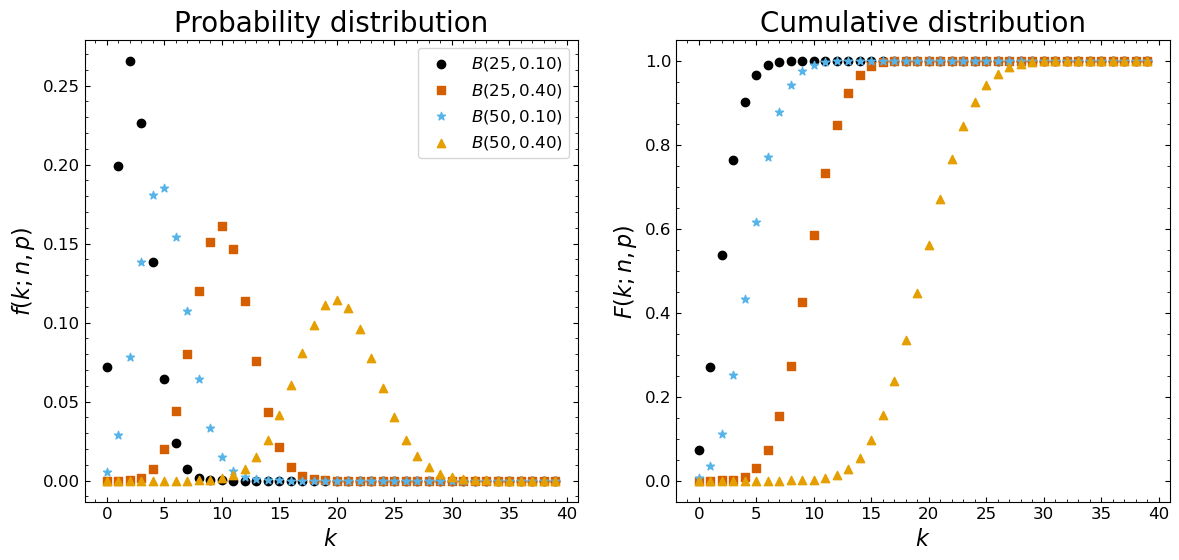

In [26]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator # This helps choose the minor ticks 

k = np.arange(0,40)

# binom.pmf(k, n, p) for n trials, k positive results with probability p for a single positive result from one pick 
# List of values and their colours to use in plots

n_list = [25,   25,  50, 50] 
p_list = [0.1, 0.4, 0.1, 0.4]
colours = ['black','#D55E00','#56B4E9','#E69F00']

fig, axs = plt.subplots(1,2,figsize = (14,6))
#marker_list = ["+", "x", "1", "2", "3", "4", "|", "_", ","]
marker_list = ["o", "s", "*", "^"] # change symbol and colour to address different visual capabilities
# Now plot 4 different sets of values on each of two subplots accessed via ax[0] and ax[1].
for i in range(4):  
    axs[0].scatter(k,binom.pmf(k,n_list[i],p_list[i]), 
                   label='$B({:.0f},{:.2f})$'.format(n_list[i],p_list[i]),
                   color=colours[i], marker = marker_list[i])
    # Now we could sum up the pdf (pmf) by hand to get the cdf (cumulative distribution) but we are lazy and just use the bnuilt in cdf
    axs[1].scatter(k,binom.cdf(k,n_list[i],p_list[i]), 
                   label='$B({:.0f},{:.2f})$'.format(n_list[i],p_list[i]),
                   color=colours[i], marker = marker_list[i]) 

axs[0].set_xlabel('$k$',fontsize = 16)
axs[0].set_ylabel('$f(k;n,p)$',fontsize = 16)
axs[0].tick_params(labelsize = 12,direction='in',top=True,right=True,which='both')
#axs[0].xaxis.set_minor_locator(MultipleLocator(1))
#axs[0].yaxis.set_minor_locator(MultipleLocator(0.01))
axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].set_title('Probability distribution',fontsize = 20)

axs[1].set_xlabel('$k$',fontsize = 16)
axs[1].set_ylabel('$F(k;n,p)$',fontsize = 16)
axs[1].tick_params(labelsize = 12,direction='in',top=True,right=True,which='both')
#axs[1].xaxis.set_minor_locator(MultipleLocator(1))
#axs[1].yaxis.set_minor_locator(MultipleLocator(0.04))
axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].set_title('Cumulative distribution',fontsize = 20)


axs[0].legend(loc='upper right',fontsize = 12)

## Poisson distribution

The Poisson distribution is a discrete probability distribution that is used to model counts. As the possible events here are different count values, these are non-negative integers but without any limit. Compare to the Binomial distribution where the count was limited by $n$, the number of trials. 

The Poisson distribution is appropriate for problems where we are counting events in a fixed period of time (or space) that occur randomly and independently but each at the same mean rate (or mean density). 

<!-- This distribution is valid for:
* Events that occur in a fixed interval of time or space
* Events are independent of the time since the previous event -->

Probability for a given number of events $k$, with a mean rate $\lambda$, is given by

\begin{equation*}
f(k; \lambda) = \frac{\lambda^ke^{-\lambda}}{k!}
\end{equation*}

As before the CDF can be calculated by summing the probability distribution up to the evaluation value. 

The expectation $\langle k \rangle$ and variance $\sigma^2$ can be shown to both be equal to $\lambda$
\begin{equation}
\langle k \rangle = \sum_{k=0}^\infty k f(k;\lambda) 
\quad = \quad
\sigma^2 
= \langle k^2 \rangle - (\langle k \rangle)^2
= \sum_{k=0}^n (k - \langle k \rangle)^2 f(k;\lambda) \quad = \lambda \, .
\end{equation}

The Poisson distribution is implemented in `scipy.stats`, so it is easy to visualise the probability as a function of $k$ for a given $\lambda$ along with the CDF.

<>:21: SyntaxWarning: invalid escape sequence '\l'
<>:30: SyntaxWarning: invalid escape sequence '\l'
<>:21: SyntaxWarning: invalid escape sequence '\l'
<>:30: SyntaxWarning: invalid escape sequence '\l'
/var/folders/ry/gzww70hd00sdtqqjbzbd0bdh0000gn/T/ipykernel_26312/797923575.py:21: SyntaxWarning: invalid escape sequence '\l'
  axs[0].set_ylabel('$f(k;\lambda)$',fontsize = 16)
/var/folders/ry/gzww70hd00sdtqqjbzbd0bdh0000gn/T/ipykernel_26312/797923575.py:30: SyntaxWarning: invalid escape sequence '\l'
  axs[1].set_ylabel('$F(k;\lambda)$',fontsize = 16)


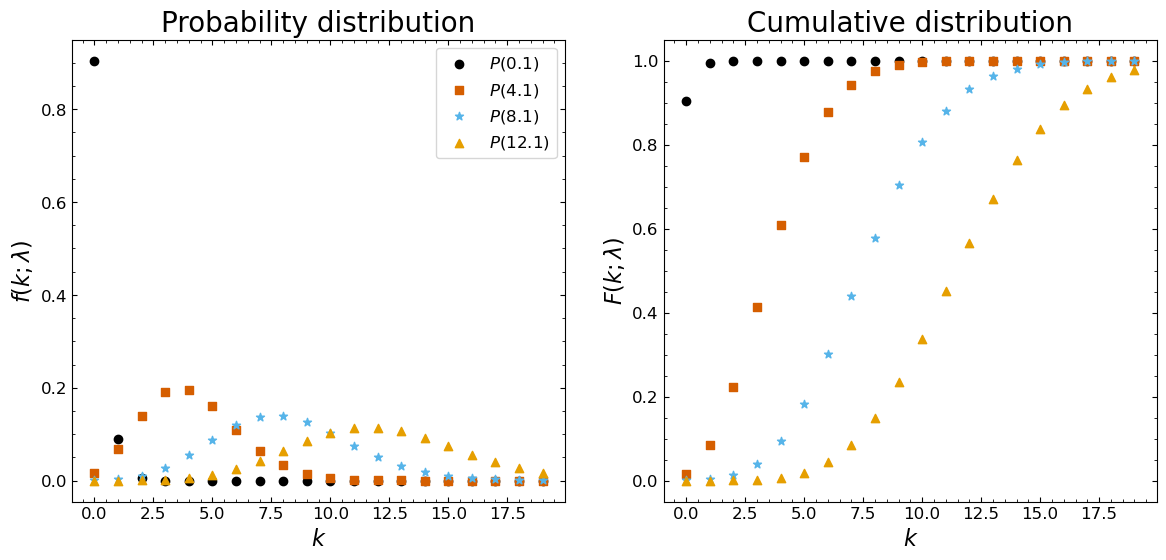

In [27]:
from scipy.stats import poisson

# In principle, k is any non-negative integer but we will only go upto 20 in this example. 
k = np.arange(0,20)

# List of four lambda values to use in Poisson distribution examples
lambdas = np.arange(0.1,16,4.0)

fig, axs = plt.subplots(1,2,figsize = (14,6))

# Now compare the use of a list we never use to set the plot values as opposed to a simple loop used for Binomial.
# This form using a "list comprehension" is faster but for such a small set of values we will never notice the difference.
# I would normally use the simpler loop here as I don't need speed here but clarity is always valuable.
# However, to illustrate this trick I will use the list comprehension here.
[axs[0].scatter(k,poisson.pmf(k,lambdas[i]),label='$P({:.1f})$'.format(lambdas[i]),
                color=colours[i], marker = marker_list[i]) for i in range(4)]
[axs[1].scatter(k,poisson.cdf(k,lambdas[i]),label='$P({:.1f})$'.format(lambdas[i]),
                color=colours[i], marker = marker_list[i]) for i in range(4)]

axs[0].set_xlabel('$k$',fontsize = 16)
axs[0].set_ylabel('$f(k;\lambda)$',fontsize = 16)
axs[0].tick_params(labelsize = 12,direction='in',top=True,right=True,which='both')
#axs[0].xaxis.set_minor_locator(MultipleLocator(0.5))
#axs[0].yaxis.set_minor_locator(MultipleLocator(0.04))
axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].set_title('Probability distribution',fontsize = 20)

axs[1].set_xlabel('$k$',fontsize = 16)
axs[1].set_ylabel('$F(k;\lambda)$',fontsize = 16)
axs[1].tick_params(labelsize = 12,direction='in',top=True,right=True,which='both')
#axs[1].xaxis.set_minor_locator(MultipleLocator(0.5))
#axs[1].yaxis.set_minor_locator(MultipleLocator(0.04))
axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].set_title('Cumulative distribution',fontsize = 20)


axs[0].legend(loc='upper right',fontsize = 12)

### Poisson distribution as a limit of the Binomial distribution

Consider a binomial distribution $f(k; n, p)$. Think of the limit where we have a large number of samples $n$ but a very small probability of success $p$ such that the product $\lambda = np$ is constant. In this case the binomial distribution in this limit converges to the Poisson distribution $f(k; \lambda = n \, p)$
\begin{equation*}
\lim_{n\to\infty,\,p\to0}f(k; n, p) = \frac{(np)^k}{k!}e^{-np} = \frac{\lambda^k}{k!}e^{-\lambda} = f(k; \lambda),
\end{equation*}

<div style="background-color: #FFF8C6">

#### Optional Example: radioactive atoms.
    
Suppose the probability any one atom decays in an interval $t$ as measured in our Geiger counter. This is a binary result, the atom decays or its doesn't.  So if we have $N$ atoms, each can decay in time $t$ with the same probability $p$ as every other atom (i.e. events are statistically independent).   The probability of measuring $k$ decays in time $t$ is given by a Binomial distribution. We would get a good fit by measuring the average number of deacys $\langle k \rangle$ in time $t$ and then setting $\langle k \rangle = p \, N $.  
    
However, our same in the lab probably has a few milligrammes of radioactive material so is likely to have around $N \sim 10^{20}$ radiactive atoms which is essentially an infinite number of trials $n=N$ in this context. So in practice, we will not be able to tell the difference between a Binomial distribution and a Poisson distribution with $\lambda = \langle k \rangle = p \,N$ when trying to find which gives the best fit to the data from many measurements of the counts in time intervals of length $t$.

<div style="background-color:#FFCCCB">

### Poisson distribution as a limit of the Binomial distribution

Consider a binomial distribution with a large number of samples, but a very small probability of success. We can consider this limit as $n \to \infty$ and $p \to 0$. Assuming that these limits are taken such that the product $\lambda = np$ is constant, we can show that the binomial distribution in this limit converges to the Poisson distribution.

We can rewrite the binomial distribution using $p = \frac{\lambda}{n}$:

\begin{align*}
f(k; n, p) &= \frac{n!}{k!(n-k)!}\left(\frac{\lambda}{n}\right)^k\left(1 - \frac{\lambda}{n}\right)^{n-k} \\
&= \frac{\lambda^k}{k!}\frac{n!}{(n-k)!}\left(\frac{1}{n}\right)^k\left(1 - \frac{\lambda}{n}\right)^{n-k}
\end{align*}

We can look at a couple terms of this expression separately to determine how this behaves in the limit $n \to \infty$, starting with the middle term.

\begin{equation*}
\frac{n!}{(n-k_!)}\left(\frac{1}{n}\right)^k = \frac{n(n-1)(n-2)\cdots(n - k + 1)(n -k)(n-k - 1)\cdots}{n^k(n-k)(n-k-1)\cdots}
\end{equation*}

Terms from (n-k) and downwards to 1 can be cancelled between the numerator and denominator, resulting in

\begin{equation*}
\frac{n!}{(n-k_!)}\left(\frac{1}{n}\right)^k = \frac{n}{n^k}(n-1)(n-2)\cdots(n-k+1)
\end{equation*}

We can take a factor of n out of each of the $k - 1$ bracketed terms on the right hand side, leading to
\begin{equation*}
\frac{n!}{(n-k_!)}\left(\frac{1}{n}\right)^k = \frac{n^k}{n^k}\left(1-\frac{1}{n}\right)\left(1-\frac{2}{n}\right)\cdots\left(1-\frac{k+1}{n}\right)
\end{equation*}

In the limit $n \to \infty$, each time like $\frac{1}{n}$, $\frac{2}{n}$ etc will tend to 0, thus this whole term tends to 1 as we take the limit $n \to \infty$ and $p \to 0$.

Now considering the last term in our original expression:

\begin{equation*}
\left(1 - \frac{\lambda}{n}\right)^{n-k} = \left(1 - \frac{\lambda}{n}\right)^n\left(1-\frac{\lambda}{n}\right)^{-k}
\end{equation*}

As $n\to\infty$ and $p\to 0$, $\lambda$ is constant. As a result, the second term tends to 1. The first term is more interesting, and in fact looks a lot like the usual expression for the exponential function,

\begin{equation*}
e^x = \lim_{n\to\infty}\left(1 + \frac{x}{n}\right)^n,
\end{equation*}

so we find that:

\begin{equation*}
\lim_{n\to\infty,\,p\to0}\left(1 - \frac{\lambda}{n}\right)^{n-k} = e^{-\lambda} = e^{-np}
\end{equation*}

We can therefore put everything together to show that

\begin{equation*}
\lim_{n\to\infty,\,p\to0}f(k; n, p) = \frac{(np)^k}{k!}e^{-np} = \frac{\lambda^k}{k!}e^{-\lambda} = f(k; \lambda),
\end{equation*}
where this is the Poisson distribution.

## Normal/Gaussian distribution

The **normal distribution**, also known as the **Gaussian distribution**, is the third and last distribution we shall review as this is often seen and is extremely useful. 

The reason that the normal distribution appears so often is explained by a rigourous mathematical result known as the **central limit theorem** which states that for any ensemble of $N$ random variables, the distribution of the total, the sum of the random variables, tends to a normal distribution.

<div style="background-color: #FFF8C6">
    
Aside: As far as I can see which name you use if a matter of personal preference. I am guessing that different groups of researchers prefer one name over the other, perhaps statisticians use the term *normal distribution* while I usually call it the *Gaussian distribution*.  You will see that statistical modules are usually written by/for statisticians so the routines we will use for this distribution come under the name `scipy.stats.norm` ("norm" for "normal", not sure why they had to drop just two characters!).

The normal distribution is a **continuous probability distribution**. It is a family of functions described by two parameters: the mean $\mu$ and the standard deviation $\sigma$. So the normal distribution gives the possible results for a **continuous** random variable $X$, which we may write formally as  $X \sim N(\mu,\sigma)$. The probability density function is given as

\begin{equation*}
f(X; \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{X - \mu}{\sigma}\right)^2}
\end{equation*}

Again `scipy.stats` defines the PDF and CDF for a normal distribution, that you can access easily:

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
/var/folders/ry/gzww70hd00sdtqqjbzbd0bdh0000gn/T/ipykernel_26312/13193725.py:9: SyntaxWarning: invalid escape sequence '\m'
  [axs[1].plot(x, norm.cdf(x,m,s),label = '$\mu$ = {:.1f}, $\sigma$ = {:.1f}'.format(m,s), color = c) for m, s, c in zip(mu_range,sig_range, colours)]
/var/folders/ry/gzww70hd00sdtqqjbzbd0bdh0000gn/T/ipykernel_26312/13193725.py:12: SyntaxWarning: invalid escape sequence '\m'
  axs[0].set_ylabel('$f(X; \mu, \sigma)$',fontsize = 16)
/var/folders/ry/gzww70hd00sdtqqjbzbd0bdh0000gn/T/ipykernel_26312/13193725.py:22: SyntaxWarning: invalid escape sequence '\m'
  axs[1].set_ylabel('$F(X;\mu,\sigma)$',fontsize = 16)


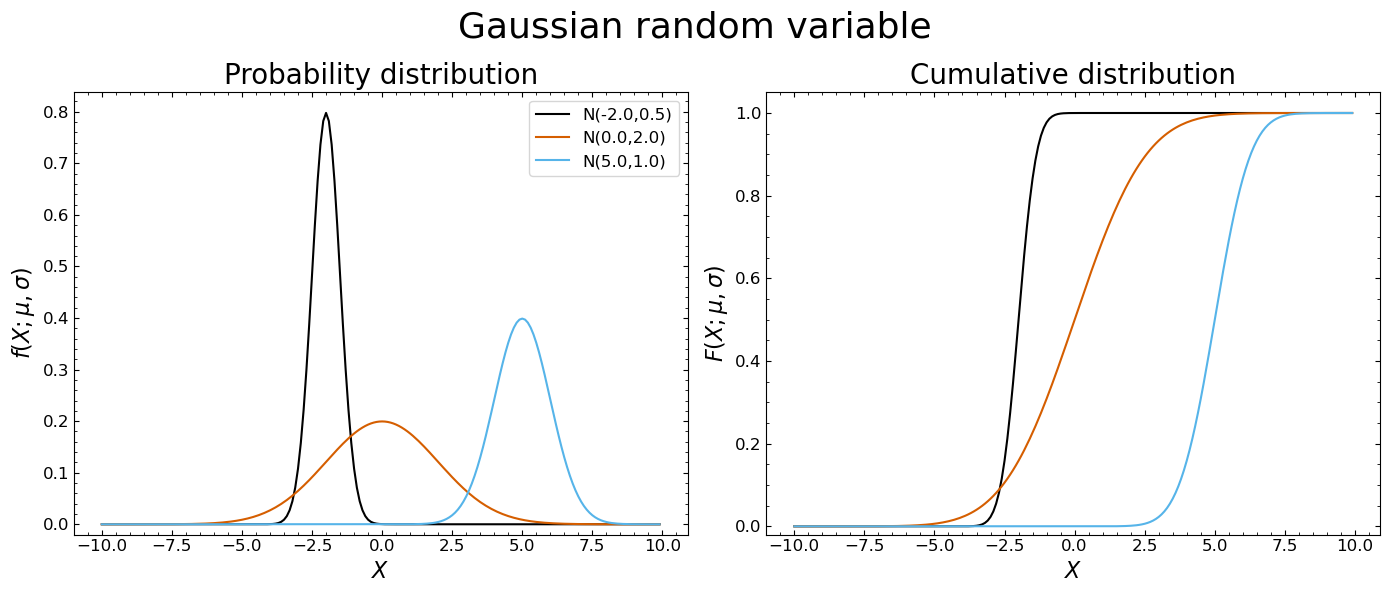

In [28]:
from scipy.stats import norm

x = np.arange(-10,10,0.1)
mu_range = [-2,0,5]
sig_range = [0.5,2,1]

fig, axs = plt.subplots(1,2,figsize = (14,6))
[axs[0].plot(x, norm.pdf(x,m,s),label = 'N({:.1f},{:.1f})'.format(m,s), color = c) for m, s, c in zip(mu_range,sig_range,colours)]
[axs[1].plot(x, norm.cdf(x,m,s),label = '$\mu$ = {:.1f}, $\sigma$ = {:.1f}'.format(m,s), color = c) for m, s, c in zip(mu_range,sig_range, colours)]

axs[0].set_xlabel('$X$',fontsize = 16)
axs[0].set_ylabel('$f(X; \mu, \sigma)$',fontsize = 16)
axs[0].tick_params(labelsize = 12,direction='in',top=True,right=True,which='both')
#axs[0].xaxis.set_minor_locator(MultipleLocator(0.5))
#axs[0].yaxis.set_minor_locator(MultipleLocator(0.02))
axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].set_title('Probability distribution',fontsize = 20)
axs[0].set_ylim(bottom = -0.02)

axs[1].set_xlabel('$X$',fontsize = 16)
axs[1].set_ylabel('$F(X;\mu,\sigma)$',fontsize = 16)
axs[1].tick_params(labelsize = 12,direction='in',top=True,right=True,which='both')
#axs[1].xaxis.set_minor_locator(MultipleLocator(0.5))
#axs[1].yaxis.set_minor_locator(MultipleLocator(0.04))
axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].set_title('Cumulative distribution',fontsize = 20)
axs[1].set_ylim(bottom = -0.02)

axs[0].legend(loc='upper right', fontsize = 12)
fig.suptitle('Gaussian random variable',fontsize = 26)
fig.tight_layout()


A normal distribution with $\mu$ = 0 and $\sigma$ = 1 is referred to as a **standard normal distribution**. 

<div style="background-color:#FFCCCB">

## Central limit theorem

You will have heard of the central limit theorem before, but we can and will prove it here. This theorem states that for a set of independent and identically distributed random variables (i.e. different samples of the same probability distribution), the distribution of the standardised sample mean tends towards the standard normal distribution, regardless of the distribution of the original variables. 

In practice, this means if we make many measurements of the same quantity, the mean and variance of those measurements will tend towards a normal distribution as we increase the number of measurements. 

To prove this, we will require **characteristic functions**. Any probability distribution has a characteristic function that completely defines it - if we know $\varphi_X(t)$, we know $f(X)$ too. This function is defined as:

\begin{equation*}
\varphi_X(t) = \int_{-\infty}^\infty e^{itX}f(X)dX
\end{equation*}

This is equivalent to taking the Fourier transform of the probability density function. All properties of Fourier transforms can therefore be applied to characteristic functions. In particular, the one we will make use of for proving the central limit theorem is the sum-product relation: the characteristic function of the sum of independent variables is the product of the individual characteristic functions, i.e.

\begin{equation*}
\varphi_{X_1 + \cdots + X_n}(t) = \prod_{i = 1}^n\varphi_{X_i}(t)
\end{equation*}

### Central limit theorem for independent and identically distributed random variables


* Consider a set of $n$ independent random variables $X_i$, each with mean $\mu$ and variance $\sigma^2$
* The sum of these random variables $X_1 + \cdots + X_n$ has a mean $n\mu$ and variance $n\sigma^2$ (as variables are independent)
* Define the standardised sum of these random variables:

\begin{equation*}
Z_n = \frac{X_1 + \cdots +X_n - n\mu}{\sqrt{n\sigma^2}} = \sum_{i = 1}^n\frac{X_i - \mu}{\sqrt{n\sigma^2}}
\end{equation*}

* Define standardised random variables $Y_i = \frac{X_i - \mu}{\sigma}$ with mean = 0 and variance = 1, such that

\begin{equation*}
Z_n = \sum_{i = 1}^n\frac{1}{\sqrt{n}}Y_i
\end{equation*}

* Using the definition of the characteristic function, the characteristic function $\varphi_{Z_n}$ is given by

\begin{equation*}
\varphi_{Z_n}(t) = \varphi_{Y_1}\left(\frac{t}{\sqrt{n}}\right)\varphi_{Y_2}\left(\frac{t}{\sqrt{n}}\right)\cdots\varphi_{Y_n}\left(\frac{t}{\sqrt{n}}\right)
\end{equation*}

* Because the Y_i are identically distributed, this is equal to

\begin{equation*}
\varphi_{Z_n}(t) = \left[\varphi_{Y_1}\left(\frac{t}{\sqrt{n}}\right)\right]^n
\end{equation*}

* As $n \to \infty$, the argument of $\varphi_{Y_1}$ becomes small, so we can apply a Taylor expansion:

\begin{equation*}
\varphi_{Y_1}\left(\frac{t}{\sqrt{n}}\right) = E\left[e^{i\frac{t}{\sqrt{n}}Y_i}\right] = E\left[\sum_{r = 0}^\infty\frac{\left(i\frac{t}{\sqrt{n}}Y_1\right)^r}{r!}\right] = \sum_{r = 0}^\infty\frac{\left(i\frac{t}{\sqrt{n}}\right)^r}{r!}E[Y_i^r]
\end{equation*}

Because we have standardised $Y_i$, $E[Y_1]$ = 0 and the variance $V(Y_1) = E[Y^2] - E[Y]^2 = E[Y^2]$ = 1, the first three terms of the Taylor expansion evaluate to give

\begin{equation*}
\varphi_{y_1}\left(\frac{t}{\sqrt{N}}\right) = 1 - \frac{t^2}{2n} + \mathcal{O}\left(\frac{t^3}{N^\frac{3}{2}}\right)
\end{equation*}

We can substitute this back into the expression for $\varphi_{Z_n}$ to find that

\begin{equation*}
\varphi_{Z_n}(t) = \left(1 - \frac{t^2}{2n}\right)^n
\end{equation*}

Again from our standard form of the exponential, in the limit of $n\to\infty$ we can see that

\begin{equation*}
\varphi_{Z_n}(t) = e^{-\frac{1}{2}t},
\end{equation*}
which is the characteristic function for a normal distribution with $\mu$ = 0 and $\sigma$ = 1. As a result, by a theorem known as Lévy's convergence theorem, we can say that in the limit of $n\to\infty$ the random variable $Z_n$ is distributed according to a standard normal distribution, $Z\sim N(0,1)$. This is regardless of the specifics of the distribution the random variables $X_i$ are distributed according to.

### Practical implications

For the binomial and Poisson distributions, it can be shown that the sum of outcomes of a binomial is distributed according to another binomial distribution, and the sum of Poissons is distributed according to another Poisson distribution. 

To demonstrate this, consider a binomially distributed variable. Taking $N$ trials, then taking another $N$ trials, is the same as just taking $2N$ trials to begin with. For a Poisson distribution, consider Poisson random variable with expectation $\lambda$. If $N$ measurements are made, the total average number expected over these $N$ trials is $N\lambda$. This is equivalent to making a single measurement of a Poisson random variable with expectation $N\lambda$. 

At what scale is it appropriate to approximate a binomial or Poisson distribution with a normal distribution? It depends on the parameters of the distributions; for binomial distributions, we need to make the number of trials $n$ sufficiently large, whereas for the Poisson distribution we need sufficiently large $\mu$. Typically, a value of $\mu$ around 100 gives a reasonable Gaussian approximation to the Poisson distribution, whereas for a binomial the necessary value of $n$ depends on the probability $p$ and generally requires $1\ll Np \ll N$.


## $\chi^2$ distribution

We will see next week how this distribution is used when trying to find out how well some data is represented by a function found by fitting to that data, something known as goodness of fit test and specifically the $\chi^2$ test for goodness of fit.

#### Motivation

The motivation for the chi square distribution comes from the following observation. If we have a random variable $X$ drawn from a Gaussian distribution with mean $\mu$ and standard devation $\sigma$, then it is often helpful to think of a variable known as the **pull**  defined as  
$$
Z = \left(\frac{X - \mu}{\sigma}\right).
$$
This random variable $Z$ is distributed as a standard Gaussian, that is with mean zero and standard deviation $1.0$. These are a useful way to reparameterise the randomness since $Z$ takes on standard values.  Put another way, we expect these pulls to be within one sigma of the mean 68\% of the time so $|Z|<1$ about two thirds of the time, $|Z|<2$ 95% of the time and $|Z|>3$ only 0.3% of the time.

If we have different random variables $X_i$, say for different bins $i$, each with a different mean $\mu_i$ and standard deviation $\sigma_i$, then to make a fair comparison of the results compared to the mean for each bin, for each different random variable, working in term sof the pulls $Z_i$ gives us this fair comparison.

Since $(Z_i)^2\geq 0$, this is a useful way for measuring how far the random variable $X_i$ is from the expected value, the size of the deviation expected due to random fluctuations. The sum of these squares over all the different variable $Z_i$, all the different bins, is a fair way to assess the expected variation in meausrements due to pure statistical noise. If we find larger deviations, then this tells us we have something more than simple noise in our data. Hence why the properties of the sum of the pulls, these independent standarised Guassian random variables, is of interest.

We will revisit this motivation next week to use it as a measure of the goodness of fit. 

#### Definition

The $\chi^2$ distribution (also known as the "chi-square" or incorrectly but commonly as the "chi-squared" so use whatever you like) is a very important distribution that is related to the normal distribution. It is a family of continuous probability distribution with one parameter $N_\mathrm{dof}$, the number of degrees of freedom. The $\chi^2(N_\mathrm{dof})$ distribution describes the likelihood of finding a value for a continuous random variable $X$ which is equal to the sum of the squares of $N_\mathrm{dof}$ independent random variables drawn from a standard normal distribution (mean $0$, standard deviation $1$). Note that $X$ is continuous but here cannot be negative.

That is if we have $N_\mathrm{dof}$ independent, standard normal variables $\{ Z_1$, $\cdots$, $Z_N \}$, we can look at the distribution of the sum of their squares, $Q$, 
\begin{equation}
Q = \sum_{i = 1}^{N_\mathrm{dof}} Z_i^2 \, .
\end{equation}
Then $Q$ is distributed according to a $\chi^2$ distribution with $N_\mathrm{dof}$ degrees of freedom, which we write formally as $Q \sim \chi^2(N)$

Once again `scipy.stats` has a good implementation of the $\chi^2$ distribution, for any given number of degrees of freedom, `scipy.stats.chi2`.

<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
/var/folders/ry/gzww70hd00sdtqqjbzbd0bdh0000gn/T/ipykernel_26312/4278373484.py:10: SyntaxWarning: invalid escape sequence '\c'
  label="$\chi^{2}(%d)$"%ndof[i],
/var/folders/ry/gzww70hd00sdtqqjbzbd0bdh0000gn/T/ipykernel_26312/4278373484.py:14: SyntaxWarning: invalid escape sequence '\c'
  label="$\chi^{2}(%d)$"%ndof[i],
/var/folders/ry/gzww70hd00sdtqqjbzbd0bdh0000gn/T/ipykernel_26312/4278373484.py:39: SyntaxWarning: invalid escape sequence '\c'
  fig.suptitle('$\chi^2$ random variable',fontsize = 26)


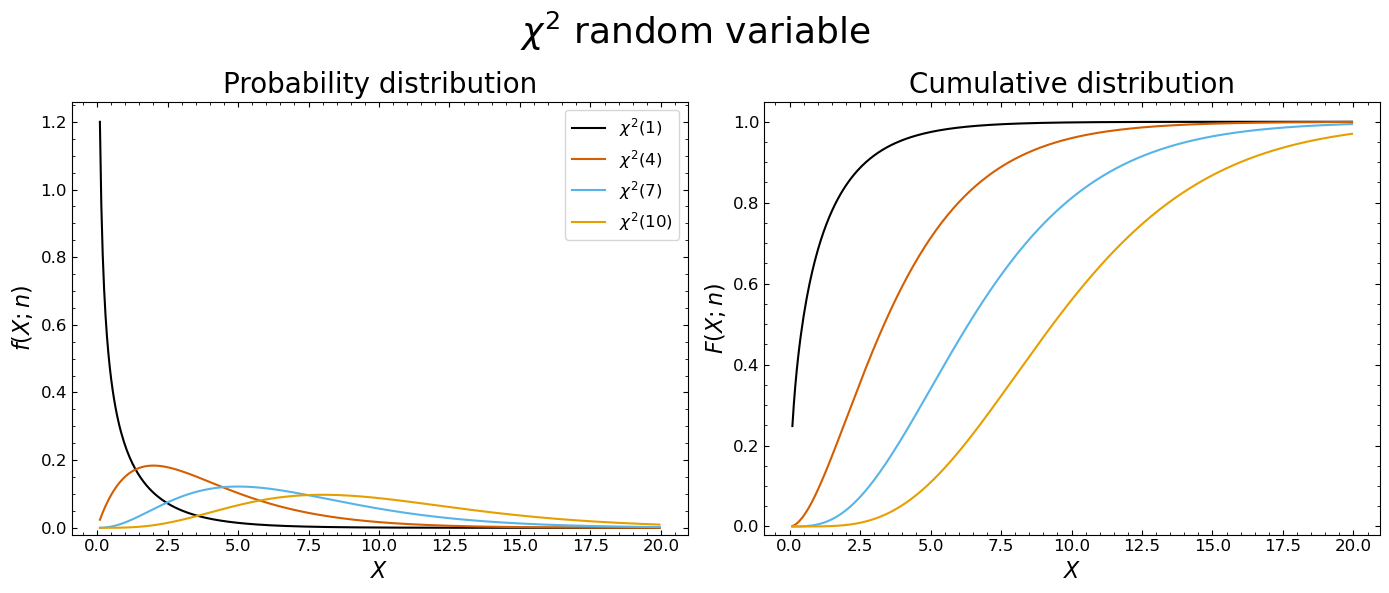

In [29]:
from scipy.stats import chi2

x = np.arange(0.1,20,0.05)
ndof = range(1,12,3)

# plotting
fig, axs = plt.subplots(1,2,figsize=(14,6))

[ axs[0].plot( x, chi2.pdf(x,ndof[i]),
              label="$\chi^{2}(%d)$"%ndof[i],
              color=colours[i]) 
              for i in range(4) ]
[ axs[1].plot( x, chi2.cdf(x,ndof[i]),
              label="$\chi^{2}(%d)$"%ndof[i],
              color=colours[i]) 
              for i in range(4) ]

axs[0].set_xlabel('$X$',fontsize = 16)
axs[0].set_ylabel('$f(X; n)$',fontsize = 16)
axs[0].tick_params(labelsize = 12,direction='in',top=True,right=True,which='both')
#axs[0].xaxis.set_minor_locator(MultipleLocator(0.5))
#axs[0].yaxis.set_minor_locator(MultipleLocator(0.04))
axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].set_title('Probability distribution',fontsize = 20)
axs[0].set_ylim(bottom = -0.02)

axs[1].set_xlabel('$X$',fontsize = 16)
axs[1].set_ylabel('$F(X;n)$',fontsize = 16)
axs[1].tick_params(labelsize = 12,direction='in',top=True,right=True,which='both')
#axs[1].xaxis.set_minor_locator(MultipleLocator(0.5))
#axs[1].yaxis.set_minor_locator(MultipleLocator(0.04))
axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].set_title('Cumulative distribution',fontsize = 20)
axs[1].set_ylim(bottom = -0.02)

axs[0].legend(fontsize = 12)
fig.suptitle('$\chi^2$ random variable',fontsize = 26)
fig.tight_layout()


#### Key Property

There is one key property you need to know and that is the mean of this distribution is roughly equal to the number of degrees of freedom $N_\mathrm{dof}$. You can see this since a typical random number $Z$ drawn from a standard normal distribution is going to lie between $-1$ and $1$ about 68% of the time and between $-2$ and $2$ about 95% of the time. So a good bet is that the average value of $Z^2$ is roughly $1$. Given the  $N_\mathrm{dof}$ independent random variables $Z_i$ are all from the swme standard normal distribution, then we would guess that the sum of $Z^2$ is about equal to the number of degrees of freedom.

In fact, this can be done exactly and it turns out to be exactly true, that the mean is always equal to the number of degrees of freedom
$$
\langle Q \rangle = \int_0^\infty Q \, f_\chi(Q; N_\mathrm{dof}) \, dQ = N_\mathrm{dof} \, .
$$

Below we will repeat the plots of the $\chi^2$ distribution but rescaling the horizontal axis by the number of degrees of freedom. You will see the curves for different $N_\mathrm{dof}$ are much more similar now, especially for larger $N_\mathrm{dof}$.


<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:27: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:27: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\c'
/var/folders/ry/gzww70hd00sdtqqjbzbd0bdh0000gn/T/ipykernel_26312/1672177511.py:12: SyntaxWarning: invalid escape sequence '\c'
  label="$\chi^{2}(%d)$"%ndof[i], color=colours[i])
/var/folders/ry/gzww70hd00sdtqqjbzbd0bdh0000gn/T/ipykernel_26312/1672177511.py:14: SyntaxWarning: invalid e

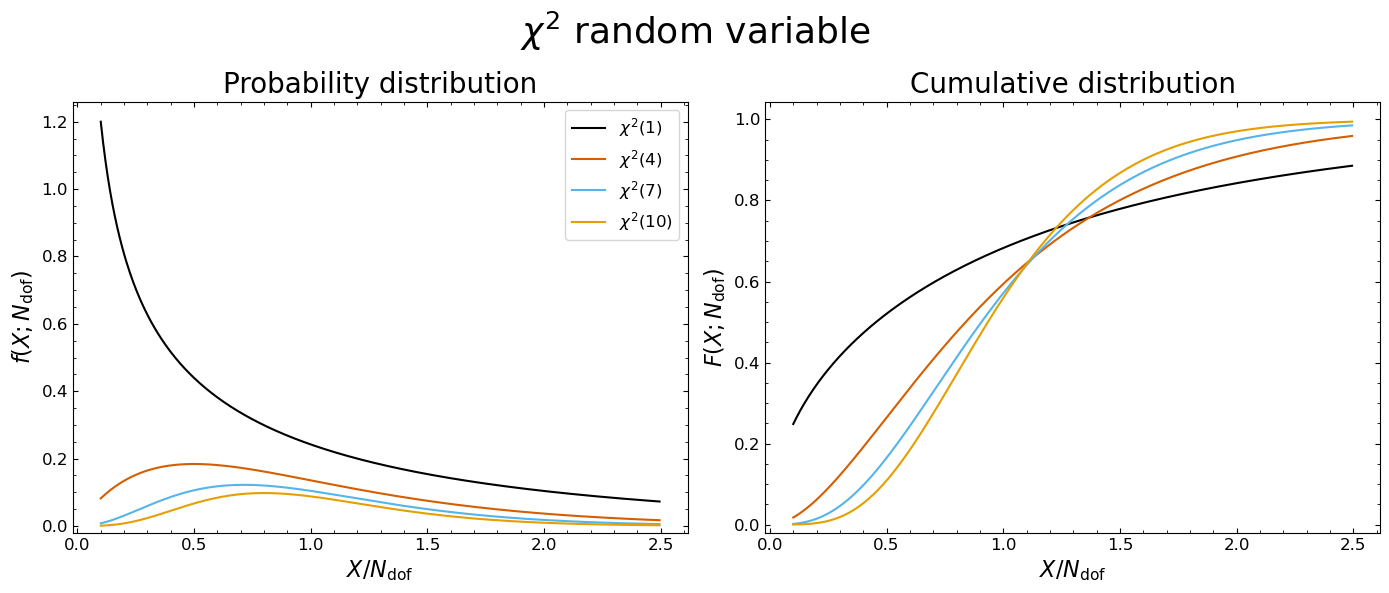

In [30]:
from scipy.stats import chi2

# xr is X/N_{dof}
xr = np.arange(0.1,2.5,0.005)
ndof = range(1,12,3)

# plotting
fig, axs = plt.subplots(1,2,figsize=(14,6))

for i in range(4):
    axs[0].plot( xr, chi2.pdf(xr*ndof[i],ndof[i]),
                 label="$\chi^{2}(%d)$"%ndof[i], color=colours[i]) 
    axs[1].plot( xr, chi2.cdf(xr*ndof[i],ndof[i]),
                 label="$\chi^{2}(%d)$"%ndof[i], color=colours[i]) 

axs[0].set_xlabel('$X/N_\mathrm{dof}$',fontsize = 16)
axs[0].set_ylabel('$f(X; N_\mathrm{dof})$',fontsize = 16)
axs[0].tick_params(labelsize = 12,direction='in',top=True,right=True,which='both')
#axs[0].xaxis.set_minor_locator(MultipleLocator(0.5))
#axs[0].yaxis.set_minor_locator(MultipleLocator(0.04))
axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].set_title('Probability distribution',fontsize = 20)
axs[0].set_ylim(bottom = -0.02)

axs[1].set_xlabel('$X/N_\mathrm{dof}$',fontsize = 16)
axs[1].set_ylabel('$F(X;N_\mathrm{dof})$',fontsize = 16)
axs[1].tick_params(labelsize = 12,direction='in',top=True,right=True,which='both')
#axs[1].xaxis.set_minor_locator(MultipleLocator(0.5))
#axs[1].yaxis.set_minor_locator(MultipleLocator(0.04))
axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].set_title('Cumulative distribution',fontsize = 20)
axs[1].set_ylim(bottom = -0.02)

axs[0].legend(fontsize = 12)
fig.suptitle('$\chi^2$ random variable',fontsize = 26)
fig.tight_layout()

## Summary

In this section, we have discussed probability distributions, including:

* Definitions of probability distributions and cumulative distributions
* Differences between discrete and continuous probability distributions
* Specific probability distributions, including binomial, poisson, normal and $\chi^2$, and their implementations in `scipy`

In the next section, we will discuss how we can generate data from a given probability distribution using Monte Carlo methods.

<div style="background-color:#FFCCCB">

### Non-examinable mathematics: The $\chi^2$ distribution for one degree of freedom, $N_\mathrm{dof}=1$    
    
Finding the $\chi^2$ distribution for one degree of freedom, $N_\mathrm{dof}=1$ is simple but illustrates has a couple of key points that often turn up (and so when missed, lead to errors) when making a change of change of variables with continuous probability distributions.
    
Consider the distribution of $Q$, the square of a single random variable $X$ which is drawn from a standard normal dtstribution, $N(0,1)$, so mean $0$ and standard deviation $1$.  Thus random variable $Q=X^2$ is distributed according to the $\chi^2$ distribution with one degree of freedom, $N_\mathrm{dof}=1$. 

We want to find the probability $f_\chi(Q;1)dQ$ of finding a result between $Q$ and $Q+dQ$ where $Q=X^2$. There are two events in $X$ space that can contribute to this value of for the probability density at value $Q$: events at values $X=+\sqrt{Q}$ and $X=-\sqrt{Q}$ both contribute.    
We know that the probability of finding a results between $X$ and $X+dX$ must be
\begin{equation}
  f_N(X)dX = \frac{1}{\sqrt{2\pi}} \exp(-X^2/2)    
\end{equation}
and between $-X$ and $-X+dX$ is
\begin{equation}
  f_N(-X)dX = \frac{1}{\sqrt{2\pi}} \exp(-(-X)^2/2)    = f_N(X)dX \, .
\end{equation}

Changing the variable we use to describe the event cannot change the probability of the actual event occuring.  So we must have that  
\begin{equation}
  f_\chi(Q;1)dQ = f_N(X)dX + f_N(-X)dX = \frac{2}{\sqrt{2\pi}} \exp(-X^2/2)\, dX
\end{equation}

The other key trick here is that we must remember that the size of the infinitesimal changes when we change variables and this is implicit in the definition of a probability density. That is $dQ \neq dX$ in general. However since $Q=X^2$ we can differentiate to see that $dQ/dX =2 X = 2 \sqrt{Q}$ so then we have that 
$$
\begin{align}
  f_\chi(Q;1)dQ 
    & = \frac{2}{\sqrt{2\pi}} \exp(-Q/2)  \frac{1}{dQ/dX}  dQ \\
    & = \frac{2}{\sqrt{2\pi}} \exp(-Q/2)  \frac{1}{2 \sqrt{Q}}  dQ \\
    & = \frac{1}{\sqrt{2\pi Q}} \exp(-Q/2)  dQ \, .
\end{align}
$$
Therefore we see that the probability density (probability mass function) for a $\chi^2$ distribution with one degree of freedom is
$$
  f_\chi(Q;1) = \frac{1}{\sqrt{2\pi Q}} \exp(-Q/2) \, .
$$
In fact, there is a closed form for the [$\chi^2$ distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution) for any $N_\mathrm{dof}$.
    
We don't need these exact formulae here. The detailed numerical evaluations are always available in efficient library functions. All we need is the intuitive results given above. 


<hr style="border:2px solid gray">
<a id='section3'></a>

# Section Five: Monte Carlo methods of data generation [^](#outline)

Often you will need to simulate data distributions from experiments or theories. For instance this helps us prepare in advance for the time when we take data from a large experiment. It is also useful when we want to compare real data with different theoretical predictions. This is called the **Monte Carlo Technique** and is in effect a form of integration. This is often used for functions that are difficult to integrate or invert. However, we will begin with the method for simple situations where we have analytical forms for all the functions we need.


## Inverse transform 

The aim is to generate a random number $X$ from the pdf (probability distribution function) $f(X)$ in the range $-\infty \le X \le \infty$. To do this we actually work with the CDF (cumulative distribution function) and we follow thefollowing algorithm.

### Algorithm 

1. Calculate the cumulative distribution $F(X) = \int_{-\infty}^X f(X') \, dX'$.
1. For properly normalised PDF (and CDF), generate a random number $u$ drawn from the uniform distribution $U(0,1)$ i.e. between $0$ and $1$.
1. Find $X$ such that $F(X) = u$ so that $X=F^{-1}(u)$. (Note that this is effectively a definition of the the "inverse function" $F^{-1}$ which we look at below.)

It is straightforward to repeat this as many times as you need to get a simulated data set drawn from the specified distribution. 

<div style="background-color:#FFCCCB">

#### Non-examinable mathematics: Proof of Inverse Transform method.
    
We need to show that if $u=F(X)$ and $X$ has a pdf $f(X)$ then the pdf $g(u)$ for the variable $u$ is the uniform probability density, i.e. $g(u)=1$. 

We first observe that the probability of observing an event is the same whether we descibe it in terms
of variable $X$ or variable $u$ as long as we have a one-to-one match, for every value of $X$ there is a unique $u$ value and vice versa. Here our definition $u=F(X)$ satisfies this requirement. Since $f(X)dX$ is a probability then for the same event $X$  we have that
$$
g(u)du = f(X)dX \, .
$$
We are trying to find $g(u)$ so we rearrange this as
$$
g(u) = f(X)\frac{dX}{du} = f(X) / \left(\frac{du}{dX}\right) \, .
$$

Now we know that
$$
u=F(X) = \int_{x_0}^X f(x') dx'
$$
so
$$
\frac{du}{dX} = \frac{F(X)}{dx} = f(X) \, .
$$
*Note* that this derivative of the cdf being equal to the pdf is completely general and is very useful relation.

Going back to our expression for $g(u)$ we see that 
$$
g(u) 
= f(X) / \left(\frac{du}{dX}\right)
= f(X) / f(X)
=1
$$
as required.

### Inverse of a function

In order to complete step 3of the algorithm, we must find the **inverse function** of the CDF, which inverts the operation of the CDF. We can write this as
\begin{align*}
F(X) &= u\\
F^{-1}(u) &= X
\end{align*}
Here the notation $F^{-1}$ indicates we are defining the inverse function of the function $F$. 

The inverse function $F^{-1}(u)$ of any function $F$ simply reverses the effect of the original function so 
$$
F^{-1}( F(X) ) = F^{-1}( u )= X 
$$
where $u = F(X)$.

Another way to look at the inverse function is it is the "reflection" of a plot of $F(x)$ vs. $X$ where we swap the usual axes.  That is if we plot values where for each point the horizontal axis coordinate is $x=F(X)$ and the vertical axis correpsonding horizontal coordinate is $y=X$. We will use this trick later where once we have the points we use numerical methods to define a smooth curve between the data points, the process of [interpolation](https://en.wikipedia.org/wiki/Interpolation).

<img src='Week2_plots/functioninverse.png' align='center'>


For simple functions, the inverse is obvious. For instance, if $F(x) = X+2$ then $F^{-1}(u) = u -2$ as $F^{-1}( F(X) ) = F^{-1}( X+2)$. If we now let $u=X+2$ then $F^{-1}( F(X) ) = F^{-1}( u) = u-2 = X$ as required.

For complicated functions, the inverse maybe impossible to find analytically so this may have to be done numerically. 
<!-- One way is to solve the equation $F(X) - u=0$ to find $X$ where function $F$ and value $u$ are known. -->

So this method is exact only for probability distribution functions which are integrable and invertable.

In order to complete step 3, we must find the **inverse function** of the CDF, which inverts the operation of the CDF. We can write this as
\begin{align*}
F(X) &= u\\
F^{-1}(u) &= X
\end{align*}
where $F^{-1}(u)$ is the inverse function of the CDF. The inverse function $F^{-1}(u)$ of any function $F$ simply reverses the effect of the original function so $F^{-1}( F(X) ) = F^{-1}( u )= X$.  

For simple functions, the inverse is obvious. For instance, if $F(x) = X+2$ then $F^{-1}(u) = u -2$ as $F^{-1}( F(X) ) = F^{-1}( X+2)$. If we now let $u=X+2$ then $F^{-1}( F(X) ) = F^{-1}( u) = u-2 = X$ as required.

For complicated functions, the inverse maybe impossible to find analytically so this may have to be done numerically. That is you have to solve the equation $F(X) - u=0$ to find $X$ where function $F$ and value $u$ are known.

So this method is exact only for probability distribution functions which are integrable and invertable.

### Example of the inverse transform method $f(X) \propto X^2$

To illustrate this, we will go through a concrete example using the PDF given as an example earlier: $f(X) \propto X^2$ for $-5\leq X \leq 5$. The PDF and CDF are given as

\begin{align*}
            & f(X) = \frac{3}{2\cdot5^3}X^2, \quad &-5 \leq X \leq 5 \\
\Rightarrow & F(X) = \int_{-5}^X f(X) \, dX = \frac{X^3}{2\cdot5^3} + \frac{1}{2}, \quad &-5 \leq X \leq 5,
\end{align*}
and can be seen in the plot below.

EFS. This form is normalised. How can you see this quickly from the CDF $F(X)$?

<img src='Week2_plots/pdf_cdf_example.png' align='center' width = 1200>

*PDF and CDF for the previously described distribution.*

This CDF is analytically invertible; we simply need to rearrange $F(X) = u$ to find a function in terms of $u$ to generate samples. We can find that the inverse function is therefore given by

\begin{equation*}
F^{-1}(u) = \sqrt[3]{2\cdot5^3\left(u - \frac{1}{2}\right)}
\end{equation*}

Note that the cube root always has one real root (the other two are complex) and this is the one we must take for our inverse. For $u\ge 0.5$ the root is real and positive while for $u\le 0.5$ the real root is negative (think of the solutions to $(+1)^{1/3}$ and $(-1)^{1/3}$). 

We define a method to give the inverse CDF function $F^{-1}(u) $ we just found above. We then use `numpy.random` to generate random numbers from the uniform distribution. Finally we our inverse function to our random numbers to produce our artificial data which should now look like the original pdf $f(X) = (3/250) X^2$ plotted earlier. 

<!-- The code cell below generates 100,000 draws from the uniform distribution $U(0,1)$ and applies the inverse function to generate the desired distribution. -->

Text(0.5, 1.0, 'Inverse transform generated data')

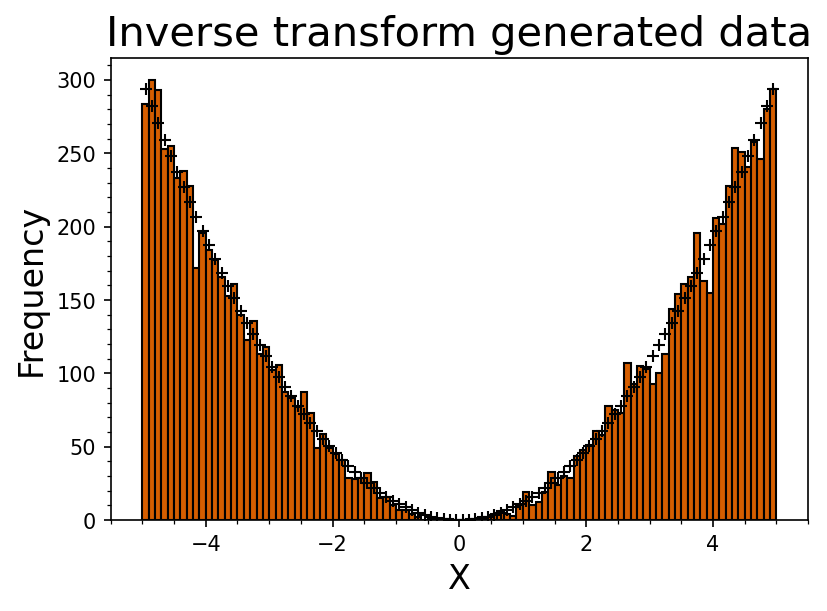

In [31]:
# Draw random numbers from pdf:- f(X)= (3/250) X^2 for -5<X<5 otherwise zero
from matplotlib.colors import to_rgba

# This is the number of measurements in the artifical data
number_observations = 10000

def inv(u):
    return np.cbrt(2*5**3*(u - 0.5))

# For reproducibility, I like to fix the seed for the random number generator, any number is as good as any other
rng_seed = 0
rng = np.random.default_rng(rng_seed) # This is a random number generator (hence "rng") method
samples = rng.uniform(0,1,size = number_observations) # These are the u values

draws = inv(samples) # These are the X=f^{-1}(u) values for each u value 
bins = np.linspace(-5,5,101) # split the space into equal size bins

# Now find exact theoretical results for comparison.  
def cdf(X):
    return X*X*X/250 + 0.5

bin_centre=[(bins[b]+bins[b-1])/2 for b in range(1,len(bins))] # use midpoint to show expected result for each bin
exact_bin_value=[number_observations *(cdf(bins[b])-cdf(bins[b-1]) ) for b in range(1,len(bins))] # Use cdf to find expected number in each bin

fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 150)
vals, bins, patches = ax.hist(draws,bins = bins,fc='#D55E00',edgecolor='black')

# This is the exct prediction for each bin from the pdf, comment it out if you want the raw results alone.
ax.plot(bin_centre,exact_bin_value, "+", color='k')

ax.set_xlabel('X',fontsize = 16)
ax.set_ylabel('Frequency',fontsize = 16)
#ax.xaxis.set_minor_locator(MultipleLocator(0.4))
#ax.yaxis.set_minor_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.set_title('Inverse transform generated data',fontsize = 20)

As you can see, this is a fairly reasonable approximation of the PDF $f(X) = \frac{3}{2\cdot5^3}X^2$ (the black crosses show the predicted value for each bin).

This method can only be used for functions that are analytically integrable and invertible. When we cannot do these analytically, we have to do it numerically.

For a PDF that is not normalised, you must also calculate the limits on $u$. For example, for $f(X) = X^2$ with $-5 \leq X \leq 5$, we define 

\begin{equation*}
u = F(X) = \frac{x^3}{3} + \frac{5^3}{3}
\end{equation*}

We can then substitute in the limits of $X$ to find the limits of $u$; substituting in $X = -5$ and $X = 5$ gives us limits of $u = 0$ and $u = \frac{2\cdot5^3}{3}$. We can then generate values $u$ from the distribution $U(0,\frac{2\cdot5^3}{3})$ to sample our desired distribution.

<div style="background-color:#C2F5DD">

### Exercise 4

By inverting the function analytically, generate a distribution with the PDF $f(X) = e^X$ for $-2 \leq X \leq 2$. Remember the following steps:

* Calculate the inverse cumulative function
* Generate randomly sampled data $u$
* Apply inverse function to samples $u$
* Histogram generated samples

<div style="background-color: #C2D5BD"> 

OPTIONAL Exercise 4b: add the theoretical prediction for the number expected in each bin.

We must first define the inverse cumulative function $F^{-1}$ of $y=f(X)= \exp(X)$ for $2 \leq X \leq +2$. Note this function is *not* normalised. Two ways to deal with this normalisation issue.

Method one is to normalise the $f(X)$ function (easy to do as we can do the integrals). 

Method two is where we adjust the range of the uniform number sample to account for this. This is what we will do here.

First we note that the cumulative function is
$$
F(X) = \int_{-2}^X dx \exp(x) = \exp(X) - \exp(-2) \, .
$$

Then note that for $2 \leq X \leq +2$ we get $u = F(X)$ lying in the range 
$0\leq u \leq F(2.0) = \exp(X) - \exp(-2)$.

To find the inverse, let $u= F(X) = \exp(X) - \exp(-2)$ then
$$
X=F^{-1}(u) = \ln(u+\exp(-2)) \, .
$$

<div style="background-color: #FFF8C6"> OPTIONAL: Method three for the overconfident is to note that the $u$ range and the $F(X)$ function defined are all simply shifted by a factor of $-\exp(-2)$ so we could just work in terms of $u' = u + \exp(-2)$ so that $\exp(-2) \leq u' \leq \exp(+2)$ and $F'^{-1}(u') = \exp(X)$ but you have to be confident to do this. Here we gain little so best to keep it simple and use method one or two.

In [32]:
# Define the inverse function using method two outlined above

y_min = np.exp(-2.0)  # I use a variable for a constant to avoid recalculating them every time

def inv(u):
    return np.log(u+y_min)

In [33]:
# Generate randomly sampled data

# This is the number of measurements in the artifical data
number_observations = 10000

# For reproducibility, I like to fix the seed for the random number generator, any number is as good as any other
rng_seed = 0
rng = np.random.default_rng(rng_seed) # This is a random number generator (hence "rng") method

""" 
The f(X)= e^{X} used here is NOT normalised.
As X runs from -2 to 2, our F(x) runs from 0 to e^{+2} - e^{+2}.
So our random numbers u in the samples list must run from 
u_min = 0 to u_max = e^{+2}-e^{-2}.
This then means that when we apply the inverse function on samples
we get X between 
    X_min = ln( 0 + e^{-2} ) = -2.0 
and 
    X_max = ln( u_max + e^{-2} ) = +2.0
as required.
""" 
samples = rng.uniform(0,np.exp(+2.0)-np.exp(-2.0),size = number_observations) 



In [34]:
# Apply inverse function to randomly sampled data

draws = inv(samples) # These are the X=f^{-1}(u) values for each u value 


Text(0.5, 1.0, 'Inverse transform generated data')

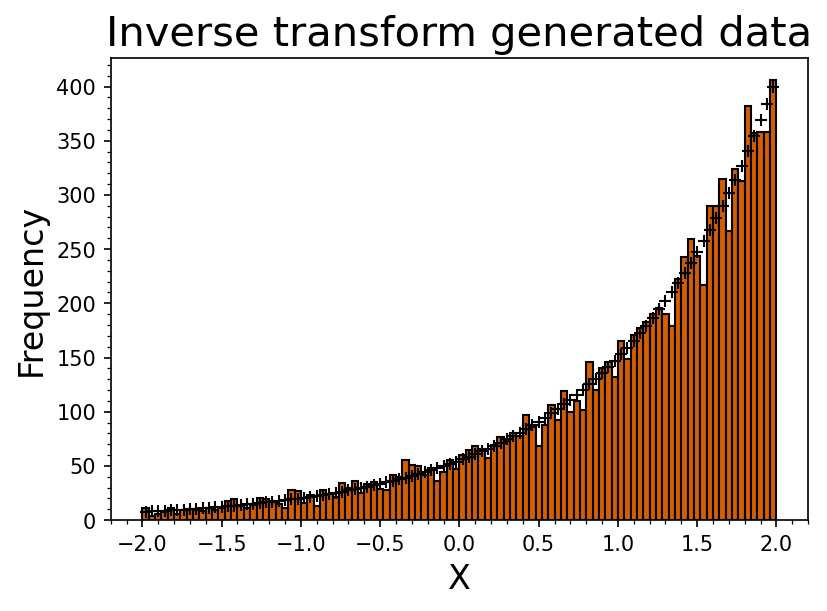

In [35]:
# Plot histogram of generated samples

# split the space into equal size bins for histogram
bins = np.linspace(-2, +2, 101)  

fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 150)
vals, bins, patches = ax.hist(draws,bins = bins,fc='#D55E00',edgecolor='black')

# OPTIONAL - find exact theoretical results for comparison.  
# This is the exact prediction for each bin from the pdf, comment it out if you want the raw results alone.
# We need normalised form to get the number of predictions correct
Z=(np.exp(2.0)-np.exp(-2.0)) # Normalisation factor
def cdf(X): # normalised form
    return (np.exp(X)-np.exp(-2.0))/Z
bin_centre=[(bins[b]+bins[b-1])/2 for b in range(1,len(bins))] # use midpoint to show expected result for each bin
exact_bin_value=[number_observations *(cdf(bins[b])-cdf(bins[b-1]) ) for b in range(1,len(bins))] # Use cdf to find expected number in each bin
ax.plot(bin_centre,exact_bin_value, "+", color='k')
# END of optional part

# Now add labels etc
ax.set_xlabel('X',fontsize = 16)
ax.set_ylabel('Frequency',fontsize = 16)
#ax.xaxis.set_minor_locator(MultipleLocator(0.4))
#ax.yaxis.set_minor_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.set_title('Inverse transform generated data',fontsize = 20)

<div style="background-color:#C2F5DD">

End of exercise 4

## Numerical Inverse Transform


The function that you have may be difficult to either integrate or invert. Some functions, like the Gaussian distribution, are only integrable numerically, or you may have data sampled only at certain points. We can instead:

* Generate samples from the known PDF (if PDF is analytic), or use our sampled data
<br>

* Find the cumulative sum of these samples & normalise it to approximate the CDF
<br>

* Invert the numerical CDF $F(X_i)$ by interpolating with $F(X_i)$ as the "X" value and $X_i$ as the "Y" value. This gives the inverse function
<br>

* Generate samples from the uniform distribution U(0,1) and apply the interpolated inverse function to them to generate samples

We will use an example from nuclear physics to demonstrate this. 

* The energy spectrum of fission neutron sources is an experimentally measured quantity, with standards published in reference documents 
<br>

* There are distributions designed to fit these spectra (e.g. the Watt distribution) but they have been determined empirically rather than from theory

You have been provided with a file called "cf_spectra.npy", which contains measured neutron rates from a $^{252}\text{Cf}$ source in different energy bins as published in ISO standards (internationally agreed standard values). These rates are measured from a given source so are currently not normalised, and are dependent on the size of the energy bin. 

The energy bins range across 10 orders of magnitude, from $10^{-8}$ to $10^2$ MeV. To visualise this properly, we will need to plot on a log scale. A plot of the PDF can be seen below.





<img src='Week2_plots/cf_spectrum.png' align='center' width=600>

*$^{252}\textit{Cf}$ neutron energy spectrum. This is an unnormalised PDF.*

The data file "cf_spectra.npy" contains X values, which are the centers of the energy bins used for measurement, and y values, which are the rate measured in each energy bin. Note that `*.npy` files are usually binary files used to store numpy arrays.  This data defines a distribution function approximately as we are not given the value for every possible real energy value. The aim of the code below is to use this incomplete data on the real distribution to generate an artifical data set of typical energy measurements by sampling from this reference distribution given in the file. 

The key step as always is inverting the cdf, finding $F^{-1}$. To do this we will use the trick of looking at the data with the axes switched, so energy as the vertical axis and the cdf $F$ used as the horizontal axis. 

To see this consider any $x$ and $y$ values linked by the function $F$ so that $y=F(x)$. In a traditional plot we would put $y$ as the vertical axis of our plot and $x$ as the horizontal axis. Mathematically, the definition of the inverse function $F^{-1}$ is that $F^{-1}$ maps the $y$ values back to the $x$ value, it is the inverse operation, so that by definition 
$$F^{-1}(y) = x \, .$$
So we can see that any plot of $x$ and $y$ values can be seen in the traditional way, the curve tells us the function $y=F(x)$ as a function of the horizontal axis $x$ values. Alternatively, we can view the same plot think of the vertical axis $y$ values as the input and then the curve gives us the $x=F^{-1}$ values on the horizontal axis. 



<div style="background-color: #FFF8C6">

NOTE:- this trick for finding the inverse function *only* works for functions where for every input $x$ value there is a unique output value $y=F(x)$ *and* vice versa. This is always true for the CDF but rarely for other functions. For instance in the rate $r=f(E)$ vs energy $E$ plot above, at rate value of $r=0.3$ could come from two possible energy $E$ values. This means the $E=f^{-1}(0.3)$ is not a single well defined number so here this unnormalised PDF $f$ does not have a well defined inverse $f^{-1}$.

To get a value of energy from the input of any given cumulative probability $F(X)$ we will use a type of interpolation called a "cubic spline" to fill in the gaps in the data. We will see some details of this later in this notebook.  

In the plot below we will see our data in this case describes a very smooth function so the interpolation works well.

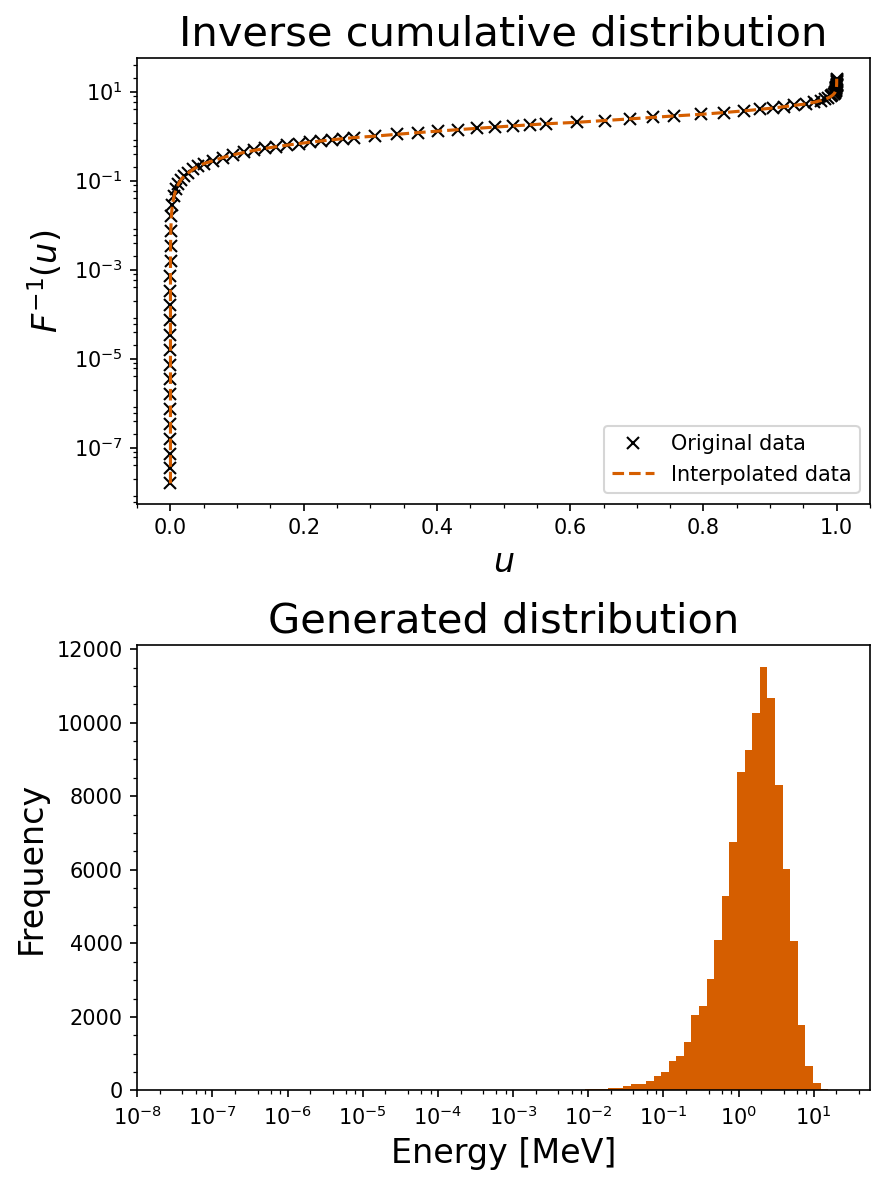

In [36]:
from scipy.interpolate import CubicSpline
from matplotlib.ticker import LogLocator

# Load the data; need to unpickle the dictionary
cf_iso = np.load('cf_spectra.npy',allow_pickle = True).item() 

X = cf_iso['X']
y = cf_iso['y']


""" Define and normalise the cumulative distribution
 THIS CODE ONLY WORKS if the input data is sorted in order of X values
 with smallest X values first. It is here.
 If not, sort the data frame  cf_iso by the 'X' column using
 cf_iso.sort_values(by=['X'])
""" 
ycdf = y.cumsum()    # This is not yet normalised but last value is the total
ycdf = ycdf/ycdf[-1] # Use the last value to normalise values 


"""
Interpolate the inverted function.

Note the ordering of arguments in th next line of code.
A smoothed version of the normalised would be ordered CubicSpline(X, ycdf).
To get the smoothed inverse function that we want we switch the order of the arguments CubicSpline(ycdf, X).
"""
inv = CubicSpline(ycdf, X)

# Check the quality of the spline

fig, (ax0,ax1) = plt.subplots(2,1,figsize = (6,8),dpi = 150)
ax0.plot(ycdf,X,'x', label='Original data',color='black')
ax0.plot(ycdf,inv(ycdf),label='Interpolated data',ls='--',color='#D55E00')
ax0.legend(loc='lower right')
ax0.set_xlabel('$u$',fontsize = 16)
ax0.set_ylabel('$F^{-1}(u)$',fontsize =16)
ax0.set_yscale('log')
ax0.set_title('Inverse cumulative distribution',fontsize = 20)
#ax0.xaxis.set_minor_locator(MultipleLocator(0.04))
ax0.xaxis.set_minor_locator(AutoMinorLocator())
ax0.yaxis.set_minor_locator(LogLocator(base = 10.0,numticks =14, subs = [0.2,0.4,0.6,0.8]))

# Generate uniform samples and apply the inverse function to them to produce the distribution

u = np.random.default_rng().uniform(0,1,size = 100000)

samples = inv(u)

# Plot histogram of generated distribution; manually specify bins using np.logspace

bins = np.logspace(-8,2,100)

ax1.hist(samples, bins = bins,color='#D55E00', label='Artificial data',)
ax1.set_xlabel('Energy [MeV]',fontsize = 16)
ax1.set_ylabel('Frequency',fontsize = 16)
ax1.set_xscale('log')
ax1.set_title('Generated distribution',fontsize = 20)
ax1.set_xlim(1e-8,56)
ax1.xaxis.set_major_locator(LogLocator(base = 10.0,numticks = 14))
ax1.xaxis.set_minor_locator(LogLocator(base = 10.0,numticks = 14, subs = [0.2,0.4,0.6,0.8]))
#ax1.yaxis.set_minor_locator(MultipleLocator(400))
ax1.yaxis.set_minor_locator(AutoMinorLocator())

fig.tight_layout()


<div style="background-color: #FFF8C6">

### An aside on interpolation

When we work with the numerical inverse transform, we need to **interpolate** to find the inverse cumulative distribution. This is a way to fill gaps within the range of the data, e.g. if we only have some samples of a continuous function. 
    
A related but distinct task is **extrapolation** where you use data to predict new results outside the range of the data e.g. to predict global temperatures in the future.

The most common type of interpolation is **linear interpolation**, where we draw a straight line between each of our data points. While this can work in some cases, if our function is complex or our data samples aren't sufficiently dense (so the true function varies a lot between out points) we can make large errors by just using linear interpolation. In these situations, we may want to use a method called a **spline**.

The basic idea of a spline is that we subdivide the space between each of our data points into multiple regions, where in each region we model the function with a polynomial. The choice of polynomial parameters and the specific splits are optimised to make the function as smooth as possible. The order of the spline is the order of the polynomial we use in each of these regions. Typically, a **cubic spline** is good enough for most purposes, but can over/understimate near extrema of a function. The plot below shows an example of linear interpolation and a cubic spline for the function $f(X) = \cos(-X^2/9)$.


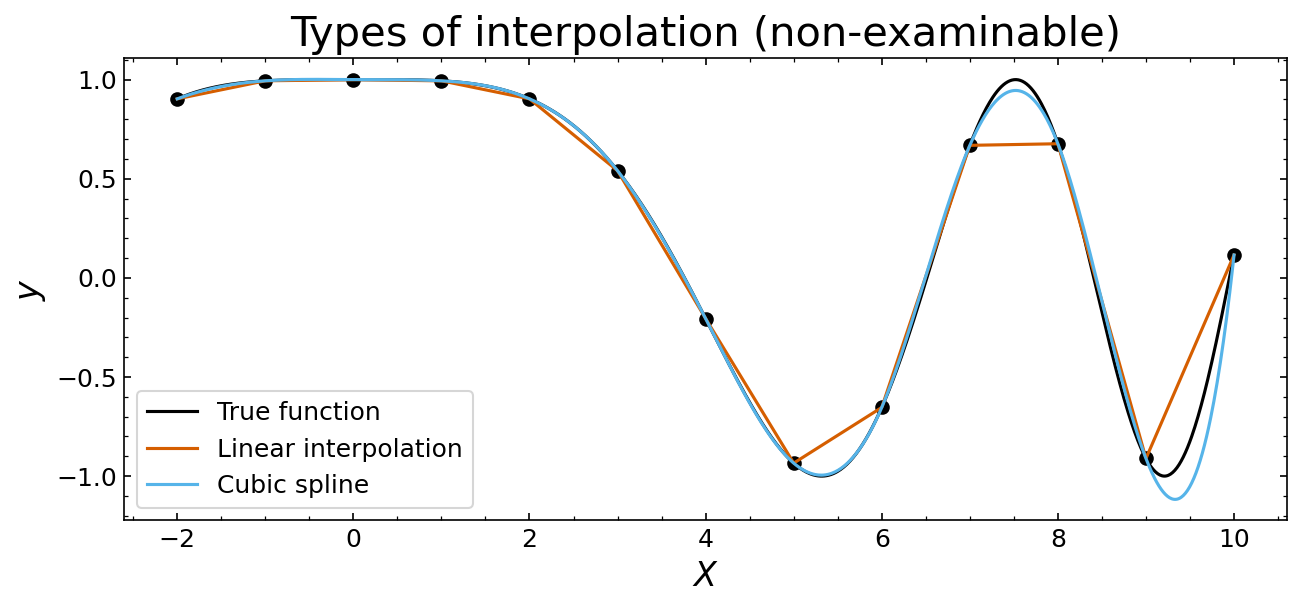

In [37]:
# Optional, non-examinable material on interpolation
from matplotlib.ticker import MultipleLocator

# x = np.array([0,0.5,1.0,1.5,2.0,2.5,3.0,3.7,4.2,4.9,5.1,5.4,5.8,6.0,6.2])
x = np.linspace(-2,10,13)
y = np.cos(-x**2/9)

xs = np.linspace(-2,10,1000)

y_linear = np.interp(xs, x, y)
y_spline = CubicSpline(x, y)(xs) # CubicSpline returns a Spline object that we have to call with the points we want to evaluate at

fig, ax = plt.subplots(1,1,figsize = (10,4),dpi = 150)
ax.scatter(x,y,color='black')
ax.plot(xs, np.cos(-xs**2/9),color='black',label='True function')
ax.plot(xs, y_linear, color='#D55E00',label='Linear interpolation')
ax.plot(xs, y_spline, color='#56B4E9',label='Cubic spline')
ax.set_xlabel('$X$',fontsize = 16)
ax.set_ylabel('$y$',fontsize = 16)
ax.set_title('Types of interpolation (non-examinable)',fontsize = 20)
ax.legend(loc='lower left',fontsize = 12)
ax.tick_params(direction='in',top=True,right=True,which='both',labelsize=12)
#ax.xaxis.set_minor_locator(MultipleLocator(0.4))
#ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
# ax.set_xlim(-2,10.5)

<div style="background-color: #FFF8C6"> End of aside on interpolation.

<div style="background-color:#C2F5DD">

### Exercise 5

(a) Using the numerical inversion method, generate samples from the standard normal distribution (a Gaussian with $\mu$ = 0 and $\sigma$ = 1).

Try plotting three different sets of generations, with different number of points generated, to see how the distribution builds up.

In [38]:
# Define a standard normal distribution and calculate some numerical data

def standard_normal(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)

# Values of X to use here when plotting
Xmin=-5.0
Xmax=5.0
Xstep=0.2
number_values= int(0.5+(Xmax-Xmin)/Xstep) + 1 # the +1 need for even steps from first to last inclusive
X = np.linspace(Xmin, Xmax, number_values) 
y = standard_normal(X)

In [39]:
# Calculate cumulative distribution from y data; remember to normalise

ycdf = y.cumsum()    # This is not yet normalised but last value is the total
ycdf = ycdf/ycdf[-1] # Use the last value to normalise values 


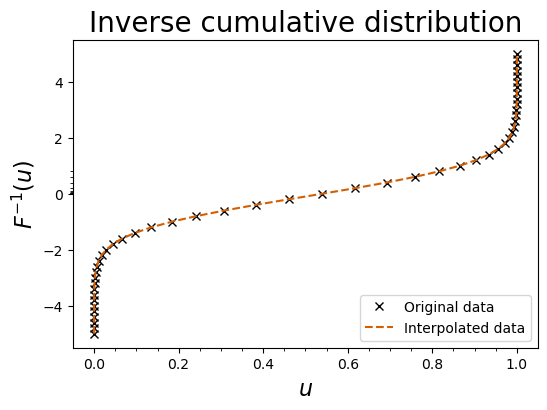

In [40]:
# Interpolate to find the inverse function; remember first argument should be cumulative distribution, then X

"""
Note the ordering of arguments in th next line of code.
A smoothed version of the normalised would be ordered CubicSpline(X, ycdf).
To get the smoothed inverse function that we want we switch the order of the arguments CubicSpline(ycdf, X).
"""
inv = CubicSpline(ycdf, X) 

# Check the quality of the spline

fig = plt.figure(figsize = (6,4)) 
ax = fig.add_subplot(111)

ax.plot(ycdf,X,'x', label='Original data',color='black')
ax.plot(ycdf,inv(ycdf),label='Interpolated data',ls='--',color='#D55E00')
ax.legend(loc='lower right')
ax.set_xlabel('$u$',fontsize = 16)
ax.set_ylabel('$F^{-1}(u)$',fontsize =16)
#ax.set_yscale('log') No log scale needed here
ax.set_title('Inverse cumulative distribution',fontsize = 20)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(LogLocator(base = 10.0,numticks =14, subs = [0.2,0.4,0.6,0.8]))


In [41]:
# Generate three samples from uniform distribution in range [0,1]

# For reproducibility, I like to fix the seed for the random number generator, any number is as good as any other
rng = np.random.default_rng(0) 

u2 = rng.uniform(0,1,size = 100)
u3 = rng.uniform(0,1,size = 1000)
u4 = rng.uniform(0,1,size = 10000)
#u5 = rng.uniform(0,1,size = 100000)


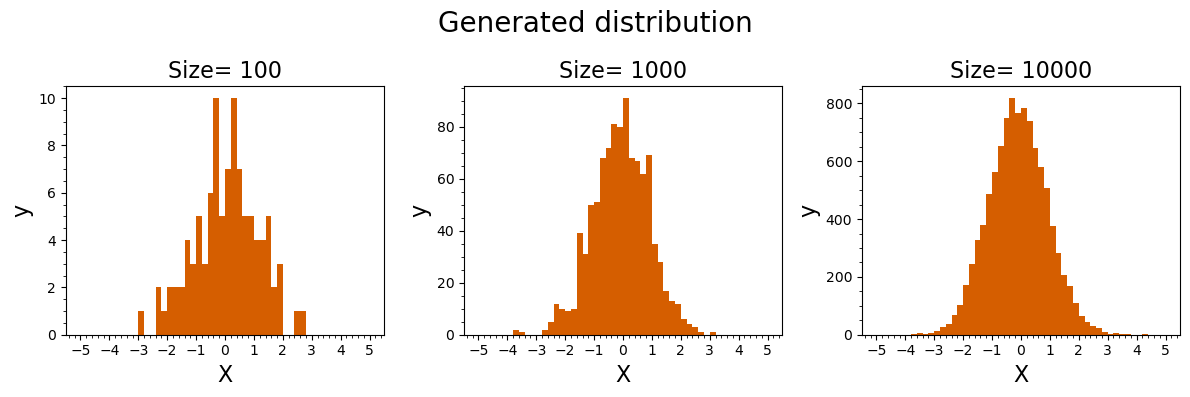

In [42]:
# Apply inverse function to samples and plot histogram

fig = plt.figure(figsize = (12,4)) 
fig.suptitle('Generated distribution',fontsize = 20)

plot_number=0
for u in [u2,u3,u4]:

    samples = inv(u)
    plot_number+=1 # index of the next plot
    ax = fig.add_subplot(1,3,plot_number)
    ax.set_title('Size= {:d}'.format(len(u)),fontsize = 16)
    
    # Could use other things for the bins but this seems useful
    #ax.plot(X,y*len(u),"-",color="k")
    ax.hist(samples, bins = X,color='#D55E00', label='Artificial data')
    
    
    ax.set_xlabel('X',fontsize = 16)
    ax.set_ylabel('y',fontsize = 16)
    ax.xaxis.set_major_locator(MultipleLocator(1.0))
    ax.xaxis.set_minor_locator(MultipleLocator(X[1]-X[0])) # set minor tick interval to bin width
    ax.yaxis.set_minor_locator(AutoMinorLocator())

fig.tight_layout()

<div style="background-color:#C2F5DD">

Exercise 5(b). Here we have used a normalised standard normal distribution; do we need to normalise a distribution to use for generating Monte Carlo data? Put your answer in the Markdown cell below.

No. 

As the example for the rate vs. energy spectrum above showed, we can find the normalised CDF easily enough from unnormalised data. The CDF is all we need to get the Monte Carlo generated artifical data.  

<div style="background-color:#C2D5BD">

Exercise 5(c) OPTIONAL. It is hard to see how good these artifical sample are.  So let us use the cumulative distribution function. It takes a little more effort to do this. I use the following function

In [43]:
def cdf_empirical(samples,X):
    """ 
    This gives the empirical cumulative distribution of the data in "samples" for any given X value 
    
    Input
    -----
    samples = the data values as a numpy array
    X = Value of the cdf we wish to know (can not also be a numpy array)   
    
    Return
    ------
    The value of the cdf at X for the given data in samples
    """
    return np.count_nonzero(samples<X)/len(samples)



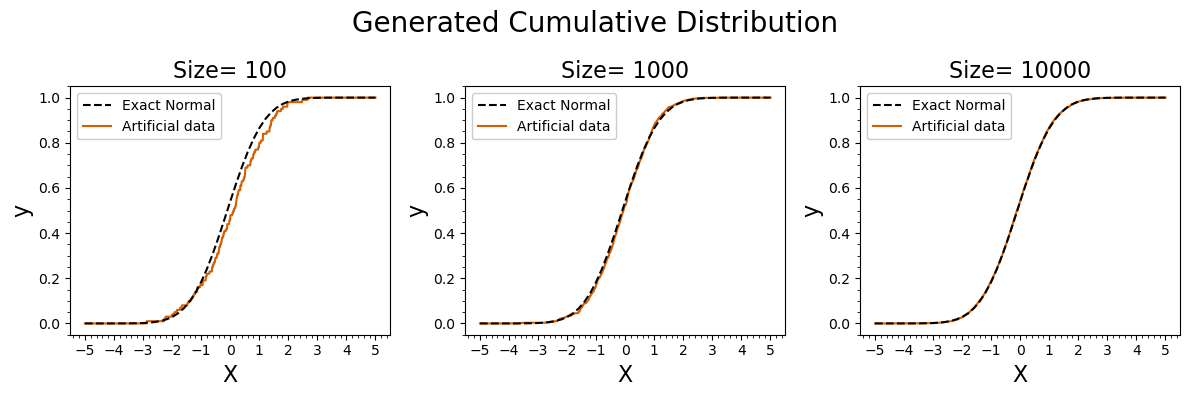

In [44]:
"""
Now you could use the same samples from the uniform distribution
created in exercise 2a above to generate artifical data.
Then use cdf_empirical to find the CDF of the artifical data
and compare by sight in a plot with the interpolated ycdf function.
""" 

newX = np.linspace(Xmin, Xmax, 1001) # need a finer step size to see jumps in empirical cdf

fig = plt.figure(figsize = (12,4)) 
fig.suptitle('Generated Cumulative Distribution',fontsize = 20)
plot_number=0
for u in [u2,u3,u4]:
    samples = inv(u)
    plot_number+=1 # index of the next plot
    ax = fig.add_subplot(1,3,plot_number)
    ax.set_title('Size= {:d}'.format(len(u)),fontsize = 16)
    
    cdf_empirical_values = [cdf_empirical(samples,x) for x in newX] 
    ax.plot(newX,cdf_empirical_values,"-", color='#D55E00', label='Artificial data')
    
    # Data for the exact normal we already have, plot second so dashed line on top of continuous line
    ax.plot(X,ycdf,"--k", label='Exact Normal')

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1],labels[::-1],loc='upper left',fontsize = 10, framealpha = 1)

    ax.set_xlabel('X',fontsize = 16)
    ax.set_ylabel('y',fontsize = 16)
    ax.xaxis.set_major_locator(MultipleLocator(1.0))
    ax.xaxis.set_minor_locator(MultipleLocator(X[1]-X[0])) # set minor tick interval to bin width
    ax.yaxis.set_minor_locator(AutoMinorLocator())

fig.tight_layout()

<div style="background-color:#C2F5DD">

End of exercise.


# The Accept-Reject Method [^](#index) <a id='accept-reject'></a>

If the PDF $f(x)$ is too complicated even to invert numerically, then we can always use the accept/reject method. This is particularly useful for functions with discontinuities.  This Accept-Reject method is performed by according to the following steps:

1. Generate a random number $X$ from a uniform distribution over the range of the desired PDF
1. Generate a second random number $y$ from the uniform distribution $h(y)$ = $U(0,a)$ where $a$ is the maximum value of the function $f(X)$ within the range of $X$ values required.  
1. If $y \leq f(X)$, then accept this point; otherwise it is rejected
1. Repeat from (1) until you have the number of points you want.
1. The set of kept values are a set random values $\{X\}$ drawn from a probability distribution with pdf f(X) 

This method only accepts points that lie beneath the desired PDF; because regions of the PDF with higher probability have more "vertical" space available, the density of points accepted in these regions is increased compared to regions of low probability. 

For example, consider a density function defined as $f(X) = -X^2 + 4$ for the range $-2 \leq X \leq 2$. The code cell below shows how we can use the accept-reject method on this function.

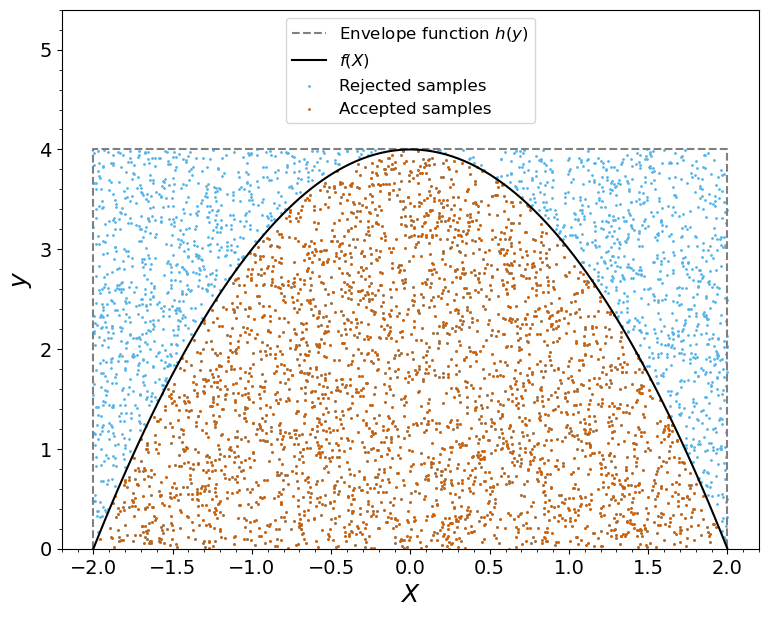

In [45]:
# Define the function. Note this is NOT normalised.
# Note for a more complicated function with discontinuities we just need more code with "if" statements
def f(x):
    return -x**2 + 4

# We want to generate values within the range X=-2..2. 
# We need $a$ the maximum value of $f(X)$ in that range which we set by hand
a_value = f(0.0)

# For reproducibility, I like to fix the seed for the random number generator, any number is as good as any other
rng = np.random.default_rng(0) 

# Generate uniform X samples in the region of interest
x_samples = rng.uniform(-2,2,size = 5000)

# Generate uniform y samples in U(0, max(f(X)) (where the max(f(X) here is at f(0))
y_samples = rng.uniform(0,a_value,size = 5000)

# Find which samples fulfill the criteria y <= f(X);
# This is an array of True and False values 
accept = (y_samples <= f(x_samples))

# Plot the PDF, envelope function, and some samples
fig, ax = plt.subplots(1,1,figsize = (9,7))
# Next draw box containing all the points which are drawn
ax.plot([-2,-2,2,2],[0,a_value,a_value,0],ls='--',color='grey',label='Envelope function $h(y)$')
# Next draw function
ax.plot(np.linspace(-2,2,100),f(np.linspace(-2,2,100)),label='$f(X)$',color='black')
ax.set_xlim(-2.2,2.2)
ax.set_ylim(0,1.35*a_value) # leave a little space at the top for the legend
ax.set_xlabel('$X$',fontsize = 18)
ax.set_ylabel('$y$',fontsize = 18)
ax.tick_params(labelsize = 14,which='both')
# Next plot ALL the points tried as failed points 
ax.scatter(x_samples, y_samples, s = 1, label='Rejected samples', color='#56B4E9')
# but then for the points we accept we plot another point to indicate accepted points as this will be on top and seen by us
ax.scatter(x_samples[accept],y_samples[accept],s = 1,c='#D55E00',label = 'Accepted samples')
ax.legend(loc='upper center',fontsize = 12)
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))


We can clearly see that only the samples beneath the desired PDF $f(X)$ are accepted, while all other samples are rejected. We can then plot a histogram of these values to verify we have successfully generated data according to our PDF:

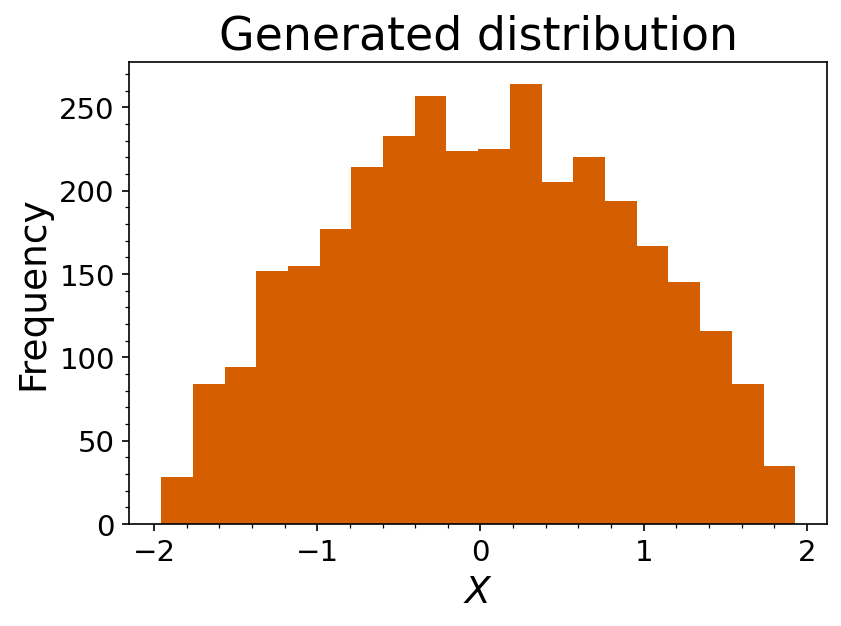

In [46]:
fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 150)
ax.hist(x_samples[accept], bins = 20,color='#D55E00')
ax.set_xlabel('$X$',fontsize = 18)
ax.set_ylabel('Frequency',fontsize = 18)
ax.tick_params(labelsize = 14,which='both')
ax.set_title('Generated distribution',fontsize = 22)
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(10))

In general, this approach is *not efficient*, as you generate far more data than is necessarily useful, depending on the shape of the function. In this case, we can find the fraction of the data that is accepted. 

In [47]:
number_kept = accept.sum() # can sum boolean values to get number of True
number_generated = len(x_samples)

fraction_accepted = number_kept/number_generated
print(fraction_accepted)

0.6546


So we have accepted about 67.0% of generated data points. This means we need to generate about 30% more data than we want, for this function; so for 100,000 data points generated according to the distribution, we must generate 130,000 data points in total. This value will depend greatly on the specifics of the PDF in question.

<div style="background-color:#C2F5DD">

### Exercise 6

Using the accept-reject method, generate a distribution with 100,000 entries for $f(X) = e^{-X^2/2}$ for $-3 \leq X \leq 3$. Remember the following steps:

* Generate random uniform samples in the range for desired PDF
* Generate random uniform samples from distribution $h(y) = U(0, a)$ where a is the maximum value of the desired PDF in the interval
* Find samples for which $y \leq f(X)$
* Plot histogram of the accepted samples

In [48]:
# Generate uniform samples in PDF range

# For reproducibility, I like to fix the seed for the random number generator, any number is as good as any other
rng = np.random.default_rng(0) 

number_samples = 100000

# Generate uniform X samples in the region of interest
x_min=-3.0
x_max=+3.0
x_samples = rng.uniform(x_min, x_max, size = number_samples)


In [49]:
# Generate uniform samples from h(y)

# Define the function. Note this is NOT normalised.
# Note for a more complicated function with discontinuities we just need more code with "if" statements
def f(x):
    return np.exp(-x*x/2)

# In this case maximum value of e^{-x^2/2) is clearly 1.0 at at x=0.0
y_max = f(0.0) 

# Generate uniform y samples in U(0, max(f(X)) (where the max(f(X)) here is at f(0))
# OPTIONAL y samples from a larger range, e.g. a_value = y_max * 1.1 
# (smaller range won't work, why?) 
a_value = y_max * 1.0
y_samples = rng.uniform(0, a_value, size = number_samples)



In [50]:
# Find accepted samples

# Find which samples fulfill the criteria y <= f(X);
# This is an array of True and False values 
accept = (y_samples <= f(x_samples))



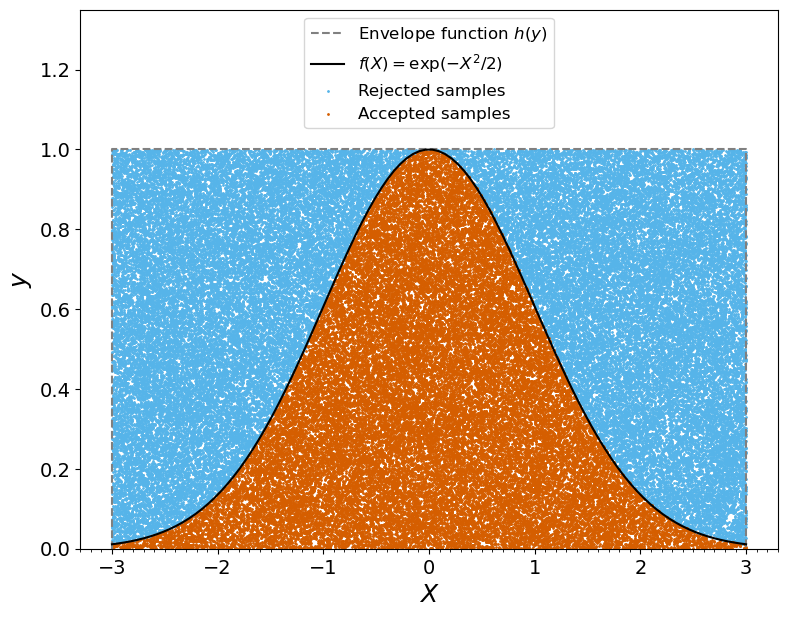

In [51]:
# Plot histogram

# Plot the PDF, envelope function, and some samples
fig, ax = plt.subplots(1,1,figsize = (9,7))

# Set range of plot to be a bit bigger than the data. Quicker to use numerical values
ax.set_xlim(x_min - np.abs(x_min)*0.1, x_max + np.abs(x_max)*0.1 ) # a fancy way to leave space at ends of x-axis
ax.set_ylim(0, 1.35*a_value) # leave a little space at the top for the legend

# Next draw box containing all the points which are drawn
ax.plot([x_min, x_min, x_max, x_max],[0,a_value,a_value,0],ls='--',color='grey',label='Envelope function $h(y)$')

# Next draw function
ax.plot(np.linspace(x_min, x_max, 100),f(np.linspace(x_min, x_max, 100)),label=r'$f(X)=\exp(-X^2/2)$',color='black')

# Can plot ALL the points tried as failed points as before.
# ax.scatter(x_samples, y_samples, s = 1, label='Rejected samples', color='#56B4E9')

# However I will use a logical NOT function to find all the rejected values
# and will only plot those points. No real advantage, just fancier (worse) programming here
# but then for the points we accept we plot another point to indicate accepted points as this will be on top and seen by us
# https://stackoverflow.com/questions/13728708/inverting-a-numpy-boolean-array-using
ax.scatter(x_samples[~accept], y_samples[~accept], s = 1, label='Rejected samples', color='#56B4E9')

# Now plot accepted points
ax.scatter(x_samples[accept],  y_samples[accept],  s = 1, label = 'Accepted samples', c='#D55E00')

# Now labels legend ticks etc
ax.set_xlabel('$X$',fontsize = 18)
ax.set_ylabel('$y$',fontsize = 18)
ax.tick_params(labelsize = 14,which='both')
ax.legend(loc='upper center',fontsize = 12)
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))

<div style="background-color:#C2F5DD"> End of exercise 6.

Of course, python has a lot of functions for generating data from some default distributions for you. Common choices include `numpy.random`, which has generators for many common distributions, or `scipy.stats`, which implements probability distributions that you can visualise (as we have done earlier) with many common methods between different distributions for producing e.g. the PDF, generating random samples, calculating the first four moments of the distribution (mean, variance, skew and kurtosis), etc.

## Summary

In this section, we have discussed Monte Carlo methods for data generation, including:

* The inverse transform method
* The numerical inverse transform method
* The accept-reject method

The following section covers the exercises you should work through this week.



<hr style="border:2px solid gray">
<a id='exercises'></a>

## Exercises [^](#outline)

<div style="background-color:#C2F5DD">

### Exercise 7

Generate a distribution of one million entries with a pdf of $\sin(x)$ between $0$ and $\pi$. Do this by:

1. Inverting the analytic integral
1. Integrating numerically
1. Using the accept-reject method

Jupyter Notebooks let you time how long a cell runs by putting `%%timeit` as the first line of a cell. Use this to time each method you use. Which one is fastest?

We have that $f(x) = Z^{-1} \sin(x)$ for $0 \leq x \leq \pi$ with $Z \neq 1.0$ needed to normalise the function. Then the CDF is
$$
 F(x) = Z^{-1} \int_0^{x'} dx' \; \sin(x) =  Z^{-1} [ - \cos(x) ]_0^x  = (1.0 - \cos(x))/Z \, .
$$
We have left in a normalisation as you will note that $F(x_\mathrm{max})=1$ is required for this CDF. So by checking  $F(\pi) = 2/Z$ we see we need a normalisation factor of $Z=2$.

If $y=F(x)$ the inverse is $x = F^{-1}(y)$ so
$$
 1-2y = \cos(x) \quad \Rightarrow \quad x = F^{-1}(y) = \cos^{-1} (1-2y) \, .
$$


[0.63696169 0.26978671 0.04097352 ... 0.18551999 0.9356096  0.02193656]
[1.84826641 1.09232065 0.40765522 ... 0.89058153 2.62847684 0.29731373]


Text(0.5, 1.0, 'Inverse transform generated data')

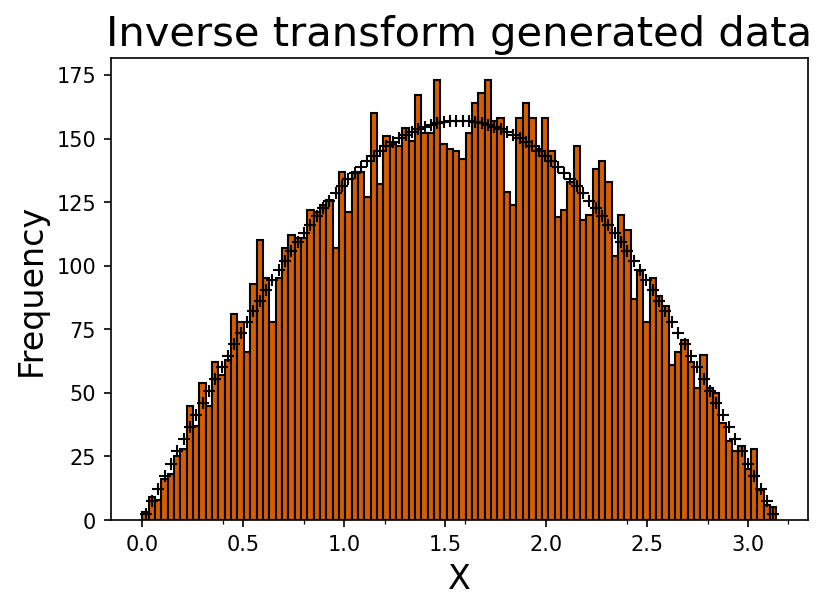

In [ ]:
#%%timeit
# NOTE some implementations appear to need the timeit command 
# as the first line of your cell.
# Analytic inverse

# Calculate and define the inverted analytic integral. Note the normalisation needed
def inv_exact(y):
    return np.arccos(1.0-(2.0*y)) 

# Limits of range of X values.
x_min = 0.0
x_max = np.pi

# Generate uniform samples

# For reproducibility, I like to fix the seed for the random number generator, any number is as good as any other
rng = np.random.default_rng(0) 

number_samples = 10000

# Generate uniform y samples in the region of interest
samples = rng.uniform(0,1,size = number_samples)

# Apply inverted function to uniform samples

draws = inv_exact(samples) # These are the X=F^{-1}(y) values for each u value 

# Plot histogram of samples
bins = np.linspace(x_min, x_max, 101) # split the X space into equal size bins

# Optional: Find exact theoretical cdf results for comparison.  
def cdf(x):
    return (1.0-np.cos(x) ) / 2.0 

bin_centre=[(bins[b]+bins[b-1])/2 for b in range(1,len(bins))] # use midpoint to show expected result for each bin
exact_bin_value=[number_samples *(cdf(bins[b])-cdf(bins[b-1]) ) for b in range(1,len(bins))] # Use cdf to find expected number in each bin

fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 150)
vals, bins, patches = ax.hist(draws,bins = bins,fc='#D55E00',edgecolor='black')

# This is the exct prediction for each bin from the pdf, comment it out if you want the raw results alone.
ax.plot(bin_centre,exact_bin_value, "+", color='k')

ax.set_xlabel('X',fontsize = 16)
ax.set_ylabel('Frequency',fontsize = 16)
ax.xaxis.set_minor_locator(MultipleLocator(0.4))
ax.yaxis.set_minor_locator(MultipleLocator(100))
ax.set_title('Inverse transform generated data',fontsize = 20)


<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
/var/folders/ry/gzww70hd00sdtqqjbzbd0bdh0000gn/T/ipykernel_26312/3019770206.py:11: SyntaxWarning: invalid escape sequence '\p'
  """ The next line should work in general


Text(0.5, 1.0, 'Inverse transform generated data')

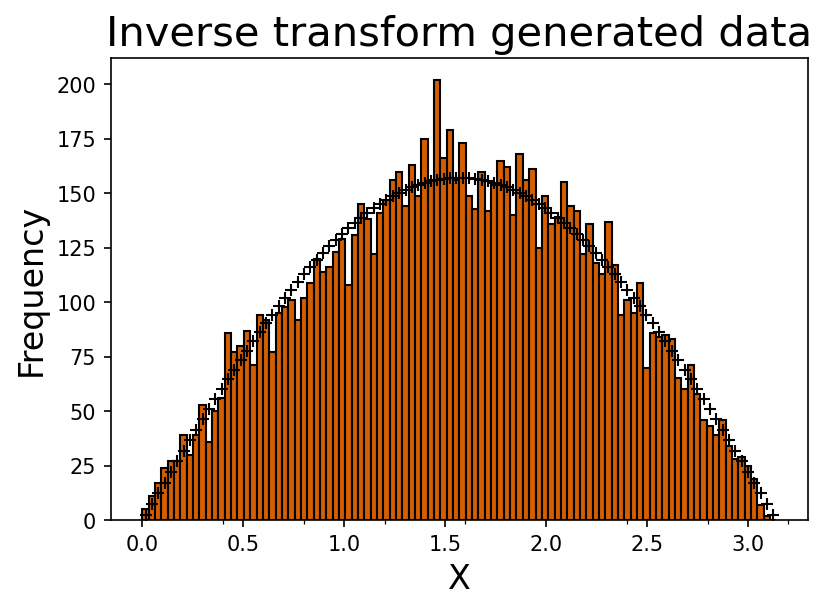

In [58]:
#%%timeit 
# Numerical inverse

# Define X points for numerical evaluation
# Generate uniform samples

# Use limits of range of X values and number of smaple set above.

# Generate X values IN ASCENDING ORDER and corresponding y values to use in the region of interest
number_interpolation_points = 100
""" The next line should work in general 
EXCEPT here the last x_values =\pi and so the last y_value is y=sin(\pi)=0.
As we are inverting the plot of F^{-1}(ycdf) vs y is behaving like an infinite gradient
and CubicSpline does not like it. 
SOLUTION. Leave the last point off using the endpoint=False
"""
X_interpolation = np.linspace(x_min, x_max, num=number_interpolation_points, endpoint=False )

# ANNOYING POINT. The last y_value is y=sin(\pi)=0 so is so close to zero that CubicSpline gets upset.
y_interpolation = np.sin(X_interpolation) # Note not normalised 

y_cumsum = y_interpolation.cumsum()    # This is not yet normalised and note leave off last value
ycdf = y_cumsum/y_cumsum[-1] # Use the last value to normalise CDF values 

# Interpolate the inverted function. Note the order of the arguments CubicSpline(ycdf, X).
inv_numerical = CubicSpline(ycdf, X_interpolation)

# Now we have our numerical approximation of the inverse CDF in inv_numerical

# Generate uniform y samples in the region of interest using same number of sample as first example
samples = rng.uniform(0,1,size = number_samples)
 
# Apply inverted function to uniform samples

draws = inv_numerical(samples) # These are the X=F^{-1}(y) values for each y value 

# Plot histogram of samples
bins = np.linspace(x_min, x_max, 101) # split the X space into equal size bins

# Optional: Find exact theoretical cdf results for comparison using cdf(x) from previous code cell.

bin_centre=[(bins[b]+bins[b-1])/2 for b in range(1,len(bins))] # use midpoint to show expected result for each bin
exact_bin_value=[number_samples *(cdf(bins[b])-cdf(bins[b-1]) ) for b in range(1,len(bins))] # Use cdf to find expected number in each bin

fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 150)
vals, bins, patches = ax.hist(draws,bins = bins,fc='#D55E00',edgecolor='black')

# This is the exct prediction for each bin from the pdf, comment it out if you want the raw results alone.
ax.plot(bin_centre,exact_bin_value, "+", color='k')

ax.set_xlabel('X',fontsize = 16)
ax.set_ylabel('Frequency',fontsize = 16)
ax.xaxis.set_minor_locator(MultipleLocator(0.4))
ax.yaxis.set_minor_locator(MultipleLocator(100))
ax.set_title('Inverse transform generated data',fontsize = 20)




*** Number of accepted samples 10041, success rate 63.9%, predicted 63.7%


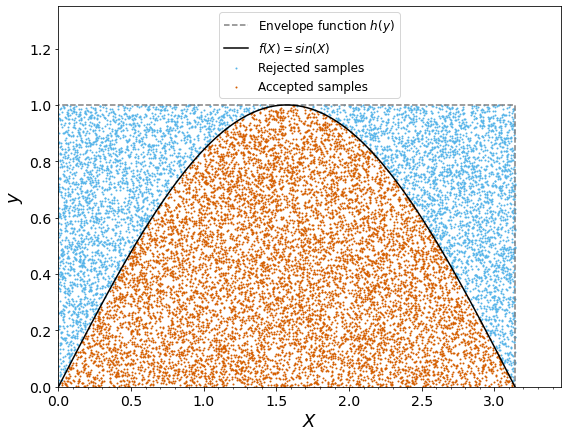

In [ ]:
%%timeit
# Accept-reject method


# For reproducibility, I like to fix the seed for the random number generator, any number is as good as any other
rng = np.random.default_rng(0) 

""" Generate uniform X samples in the region of interest
I calculate that about $2.0/\pi \approx 0.64$ the samples will be accepted so to get a distribution 
with about the same number or samples as before we must double the number of attempts.
This is the typical weakness of accept-reject, you waste time rejecting results and 64%
success is actually pretty good compared to real problems.
Optional EFS: Why do I predict $2.0/\pi \approx 0.64$? Hint - look at my plot.
"""
predicted_success_rate = 2.0/np.pi
number_ar_attempts = int(0.5 + number_samples/ predicted_success_rate) # careful, want an integer here
x_samples = rng.uniform(x_min, x_max, size = number_ar_attempts)

# Generate uniform y samples in U(0, max(f(X)) where here max(f(X)) max(sin(X)) = 1 
a_value = 1.0
y_samples = rng.uniform(0,a_value,size = number_ar_attempts)

# Find which samples fulfill the critera y <= f(X)=sin(X)
accept = (y_samples <= np.sin(x_samples))


# Plot histogram of accepted samples
# Plot the PDF, envelope function, and some samples
fig, ax = plt.subplots(1,1,figsize = (9,7))

# Set range of plot to be a bit bigger than the data. Quicker to use numerical values
ax.set_xlim(x_min - np.abs(x_min)*0.1, x_max + np.abs(x_max)*0.1 ) # a fancy way to leave space at ends of x-axis
ax.set_ylim(0, 1.35*a_value) # leave a little space at the top for the legend

# Next draw box containing all the points which are drawn
ax.plot([x_min, x_min, x_max, x_max],[0,a_value,a_value,0],ls='--',color='grey',label='Envelope function $h(y)$')

# Next draw function
ax.plot(np.linspace(x_min, x_max, 100), np.sin(np.linspace(x_min, x_max, 100)),label=r'$f(X)=sin(X)$',color='black')

# Can plot ALL the points tried as failed points as before.
# ax.scatter(x_samples, y_samples, s = 1, label='Rejected samples', color='#56B4E9')

# However I will use a logical NOT function to find all the rejected values and plot those with one colour
ax.scatter(x_samples[~accept], y_samples[~accept], s = 1, label='Rejected samples', color='#56B4E9')

# Now plot accepted points
ax.scatter(x_samples[accept],  y_samples[accept],  s = 1, label = 'Accepted samples', c='#D55E00')

# Now labels legend ticks etc
ax.set_xlabel('$X$',fontsize = 18)
ax.set_ylabel('$y$',fontsize = 18)
ax.tick_params(labelsize = 14,which='both')
ax.legend(loc='upper center',fontsize = 12)
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))

number_accepted = len(x_samples[accept])
success_rate = number_accepted/number_ar_attempts
print("*** Number of accepted samples {0:d}, success rate {1:4.1f}%, predicted {2:4.1f}%".format(number_accepted,100*success_rate, 100*predicted_success_rate ))

---
<div style="background-color:#C2F5DD">

### Exercise 8

One useful tool to illustrate the Central Limit Thoerem is a construct called a Galton machine. Such a machine is constructed as follows:

* A board with offset rows of pegs, with collection bins at the bottom
* A marble is dropped into the top of the board at the center, and left to fall to the bottom
* At each peg the marble bounces either left or right by 1 position
* When the marble reaches the bottom of the board it lands in one of the bins and the position is recorded

The figure below illustrates such a machine.

<img src='Week1_plots/galton_image.png' align='center' width=600>

We can can simulate this action. At each peg, the ball as an equal probability of going left or right. The code cell below contains a function to simulate a single step in a Galton machine.

In [59]:
# For reproducibility, I like to fix the seed for the random number generator, any number is as good as any other
rng = np.random.default_rng(0) 

def galton_step(x):
    r = rng.uniform(0,1)
    if r<0.5:
        return x-1 # Move left
    else:
        return x+1 # Move right
    


<div style="background-color:#C2F5DD">

Using this function and the code cells below, experiment with changing the number of layers and the number of trials of the Galton machine. Plot a histogram of the normalised final position of the balls dropped through the Galton machine. 

You should find the result is distributed according to the standard normal distribution $N(0,1)$.

In [60]:
n_layers = 100
n_trials = 100

finish = []
for n in range(n_trials):
    x_position = 0 # start at the centre
    for j in range(n_layers):
        x_position = galton_step(x_position)
    finish.append(x_position)

Text(0.5, 1.0, 'Inverse transform generated data')

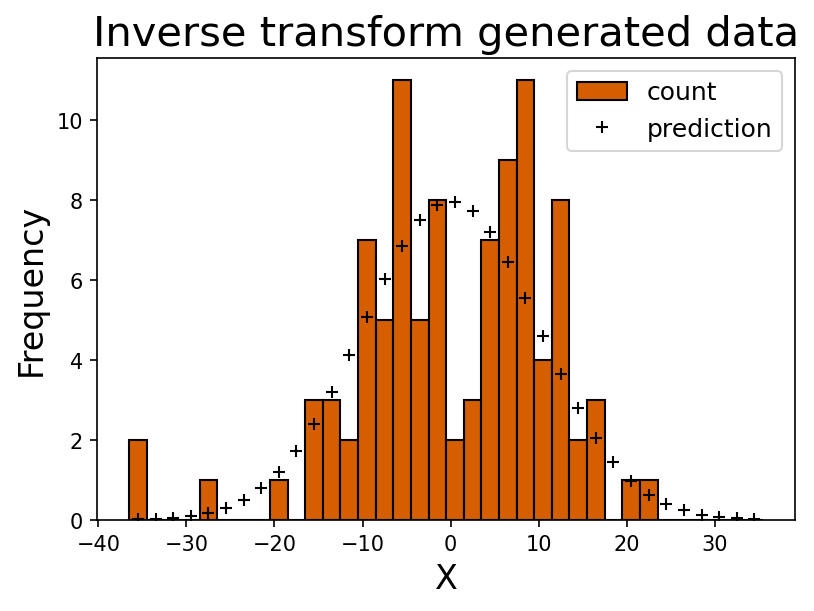

In [61]:
# Your plotting code here

x_min = min(finish)-0.5
x_max = max(finish)+0.5
# bin in steps of 2.0 because if n_layers is even then so is x_position 
# and this means the number of any odd x_position values is always zero.  
bins = np.arange(x_min,x_max,2.0) 

fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 150)
vals, bins, patches = ax.hist(finish,bins = bins,fc='#D55E00',edgecolor='black', label="count")


# Optional: Find exact theoretical cdf results for comparison 
# using theoretical prediction for many trials
mu=0.0
sigma=np.sqrt(n_layers)
bin_centre=[(bins[b]+bins[b-1])/2 for b in range(1,len(bins))] # use midpoint to show expected result for each bin
exact_bin_value=[n_trials *(norm.cdf(bins[b],mu,sigma)-norm.cdf(bins[b-1],mu,sigma) ) for b in range(1,len(bins))] # Use cdf to find expected number in each bin
# This is the exct prediction for each bin from the pdf, comment it out if you want the raw results alone.
ax.plot(bin_centre,exact_bin_value, "+", color='k', label="prediction")

# Labels and stuff
ax.set_xlabel('X',fontsize = 16)
ax.set_ylabel('Frequency',fontsize = 16)
ax.legend(fontsize = 12)
#ax.xaxis.set_minor_locator(MultipleLocator(0.4))
#ax.yaxis.set_minor_locator(MultipleLocator(100))
ax.set_title('Inverse transform generated data',fontsize = 20)




<div style="background-color: #C2D5BD"> 
    
#### Optional Exercise 8b.

How is the Galton machine related to a [random walk](https://en.wikipedia.org/wiki/Random_walk) (drunkard's walk)?

What value in the programme means we expect the mean to be zero, $\mu=0$?

Hence why do we expect the standard deviation to be $\sigma=\sqrt{L}$ where $L$ is the number of layers?

*Optional answer to exercise 8b.*

Consider a random walker on a straight line at position $x$. At each time step $t$ (an integer) they move left or right one unit with equal probability. The position of the random walker matches the position of the ball if the horizontal poistion of the ball in the diagram is $x$ and the height of the ball, measured in terms of the number of layers passed since the start is $t$. The horizontal distance between balls in adjaccent layers in the figure is set to 1, implicit in the lines of $x \pm 1$ in the `galton_step` routine. This is the size of the step of the random walker.

This means the mean value is set by the initial position of the wlaker/ball which is set in the `x_position = 0` line.
    
The standard deviation of a random walker who makes $N$ steps is $\sigma = \sqrt{N}$ and that is the likely distance from the centre of a random walker. Here the number of steps of the walker is equivalent to the number of layers the ball passes through, $N=L$.

---
<div style="background-color:#C2F5DD">

### Exercise 9

You may have encountered the famous [Monty Hall problem](https://en.wikipedia.org/wiki/Monty_Hall_problem) as an illustration of the application of [Bayes theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem). The problem goes like:

* On a gameshow, there are three doors and there is a prize behind one of these doors.
* You first choose one door but you don't open it yet.
* The host opens one of the two remaining doors to show you there was nothing behind that door.
* You then have the option to stick with your original choice, or to switch to the remaining door.
* If you open the door with the prize behind it, you win the prize.

After some though you can show that the probability of winning the prize is 1/3 if you stick with your original choice of door, while it is 2/3 if you swap doors. This may seem a bit counter-intuitive and this is one reason why it is used to illustrate why a Bayesian approach to probability can be extrememly powerful though for such a simple example you can reasch the same conclusions in other ways. 
    
Here, we will use this problem to illustrate how you might use a numerical simulation of the game to arrive at the same result by studying how the number of successes and losses converges as we make more measurements (repeat the game many times). 

The code cell below defines a function to "play" the Monty Hall game; you choose a strategy of either "stick" or "swap" with the initial (random) choice of door. The doors are labelled A, B and C. Much like with the Galton problem, we can can simulate this action.

In [62]:
prize_boxes = ['A','B','C']

def playmontyhall(strategy, ngames=1, seed=0):
    """
    Plays the Monty Hall game. 
    If only one game played then describes result of game game on screen
    
    Input
    -----
    strategy = "stick" or "swap" 
    ngames = Number  of games to play (default 1)
    seed = random number seed (default 0)
    
    Return
    ------
    List of strings, either 'win' or ' lose' giving results of the game.
    
    """
    # For reproducibility, I like to fix the seed for the random number generator, any number is as good as any other
    rng = np.random.default_rng(seed) 

    games = []
    for n in range(ngames) :
        prize = rng.choice(prize_boxes)

        # player chooses a box
        player_choice = rng.choice(prize_boxes)

        # host opens a box from remaining boxes.
        remaining_choices = [c for c in prize_boxes if c not in [prize,player_choice]]
        host_choice = rng.choice(remaining_choices)
        remaining_box = [c for c in prize_boxes if c not in [host_choice,player_choice]]

        # now player can swap or stick
        if strategy == "swap":
            original_choice = player_choice
            player_choice = remaining_box[0]
            if ngames <=1 : print("Player chose box {} originally, host opened box {}, player swapped to box {}".format(original_choice,host_choice,player_choice))
        else:
            if ngames <=1 : print("Player chose box {}, host opened box {}".format(player_choice,host_choice))
        # check for win
        if player_choice==prize: 
            games.append("win")
        else: 
            games.append("lose")
        # Messages if playing a single game
        if ngames <=1 :
            print(" .... prize was in box {}".format(prize))
            if player_choice==prize:
                print(" -----> WIN!")
            else: 
                print(" -----> LOSE :(")
    return games

playmontyhall('stick') # actually anything but "swap" gives a stick strategy
playmontyhall('swap')

Player chose box B, host opened box A
 .... prize was in box C
 -----> LOSE :(
Player chose box B originally, host opened box A, player swapped to box C
 .... prize was in box C
 -----> WIN!


['win']

<div style="background-color:#C2F5DD">

You can pass the ngames argument to run the simulation multiple times in one go. 

Using this code, running the simulation 10 times to find the number of successes and failures for each strategy. 

* What happens if you increase the number of times you run the simulation? 

If you divide the number of successes by the total number of tries you can find the probability of success for each strategy. As you increase the number of times you run the simulation, you should find this tends towards the Bayes theorem result. 

In [63]:
# Define number of runs

number_games = 100
random_seed = 0

# Run simulation
strategy_options = {'stick':1/3 , 'swap':2/3}
for strategy, predicted_success_rate in strategy_options.items():
    print("\nPlaying {} games with strategy {} and random seed {}".format(number_games, strategy, random_seed))
    # Note because the seed is the same for both runs the two strageies play EXACTLY the same games. 
    results = playmontyhall(strategy, 
                            ngames=number_games, 
                            seed=random_seed)
    
    # Calculate probability of success for each strategy
    win_count = results.count('win')
    print("--- found {0:d} wins from {1:d} giving sucess rate of {2:4.1f}%, predicted {3:4.1f}%".format(win_count,
                                                                    number_games,
                                                                    100*win_count/number_games,
                                                                    100*predicted_success_rate ))
    


Playing 100 games with strategy stick and random seed 0
--- found 39 wins from 100 giving sucess rate of 39.0%, predicted 33.3%

Playing 100 games with strategy swap and random seed 0
--- found 61 wins from 100 giving sucess rate of 61.0%, predicted 66.7%


<div style="background-color: #C2D5BD"> 
    
#### Optional Exercise 9b.

What do you expect the difference to be between the result you find for a finite number of games and the predicted strategy? Hint: what is the distribution for finding $k$ wins in $n$ games? 

*Answer to optional exercise 9b.*
    
This is a binomial distribution. We predict that in each game we will win with probability $p$ (p=1/3 for stick, p=2/3 for swap), then the probability we find $k$ wins in $n$ games is:
$$
f(k; n, p) = {n \choose k}p^k (1-p)^{n-k},
$$
and ${n \choose k} = \frac{n!}{k!(n - k)!}$ is the "binomial coefficient".

If we look up the preprties of the [Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) you will find the mean is $np$ and the variance is $\sigma^2 = np(1-p)$.

Thus a typical one standard deviation from the mean is a good estimate of how far away the actual mean in $n$ games is from the predicted result. One way to express this is to look at $z= (k - np)/\sigma$ remembering that $\sigma = \sqrt{np(1-p)}$. We expect $|z|$ to be around $1.0$ even as $n$ increases and $k$ approaches $np$. As an optional optional exercise you could even study this numerically but you probably have more interesting things to do.



<div style="background-color:#C2F5DD">

### Exercise 10

Using the concrete dataset from Section 2, perform the following actions:

* Use `query` to find all rows with Age $\lt 30$, and another `query` to separately find all rows with Age $\geq 30$.
* Plot a histogram of Strength for these two DataFrames on the same axes. Make sure to use the same bins for both of them. 

In [65]:
# Define the two DataFrames using query

df_lt_30 = concrete_data.query('Age < 30')
df_geq_30 = concrete_data.query('Age >= 30')

# It would be useful to know the largest and smallest strength values so we can choose bins
print("Concrete strength, age < 30")
print(df_lt_30['Strength'].describe())

print("\nConcrete strength, age >= 30")
print(df_geq_30['Strength'].describe())



Concrete strength, age < 30
count    749.000000
mean      31.035407
std       15.233631
min        2.330000
25%       19.420000
50%       29.730000
75%       39.460000
max       81.750000
Name: Strength, dtype: float64

Concrete strength, age >= 30
count    281.000000
mean      48.565765
std       13.468959
min       21.860000
25%       39.000000
50%       46.930000
75%       56.340000
max       82.600000
Name: Strength, dtype: float64


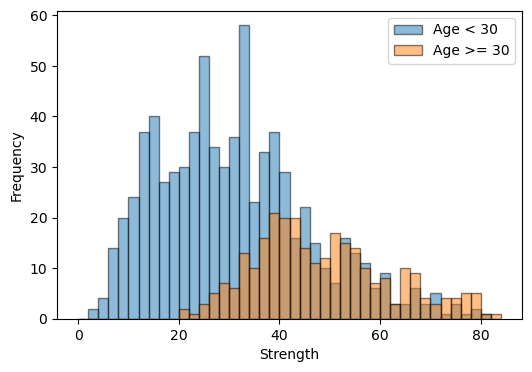

In [66]:
# Make the plot, note how we can control the size opf the plot (in inches)
fig, axs = plt.subplots(1,1,figsize = (6,4))

# Saw the min and max are roughly 0 to 80 so 40 bins so size  maybe?  
# Can always try other values to see what works.
bins = np.linspace(0,84,43) # last argument is number of intervals but these are the edges of the bins


# the alpha parameter is the transparency, between 0% (opaque) to 100% (totally transparent)
plt.hist(df_lt_30['Strength'] , bins = bins, edgecolor='black', label ='Age < 30',  alpha = 0.5)
plt.hist(df_geq_30['Strength'], bins = bins, edgecolor='black', label ='Age >= 30', alpha = 0.5)

plt.xlabel('Strength')
plt.ylabel('Frequency')
plt.legend(loc='best')

<div style="background-color:#C2F5DD">

End of exercise 10

<div style="background-color:#C2F5DD">

### Exercise 11

Using what you have now seen about plot formatting, reproduce the two histograms you plotted in Exercise 10 but with better formatting. Remember to consider:

* Clear plot colours
* Well-formatted legend
* Appropriately sized axis labels, tick labels, and title
* A grid

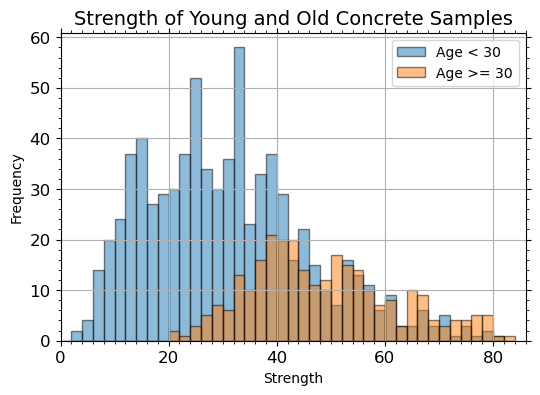

In [67]:
# I ran this a few times, each time adding something more.  


# Assume our data is still available, we defined these using query
# df_lt_30 = concrete_data.query('Age < 30')
# df_geq_30 = concrete_data.query('Age >= 30')

fig = plt.figure(figsize = (6,4)) 
ax = fig.add_subplot(111) 
ax.set_title("Strength of Young and Old Concrete Samples",fontsize= 14)
# Last time we saw that strength values were between 0 to 84 so 42 bins (43 bin edges) was about right.  
bins = np.linspace(0,84,43) # Defines edges of bins, last argument is number of values.

ax.set_xlim(0,86) # get rid of negative X values shown by default.
    
# the alpha parameter is the transparency, between 0% (opaque) to 100% (totally transparent)
ax.hist(df_lt_30['Strength'] , bins = bins, edgecolor='black', label ='Age < 30',  alpha = 0.5)
ax.hist(df_geq_30['Strength'], bins = bins, edgecolor='black', label ='Age >= 30', alpha = 0.5)

ax.grid()

# To be honest, I thought the default set of labels and grid worked well.
# If you want even fancier (but maybe not better?) this is what I tried

# By looking at the values in the earlier plots, I could set the tick sizes by hand.
# For the x I want to match the bin edges.
# A useful trick for the y is to automate the minor ticks based on the major ticks, a pain to do by hand
from matplotlib.ticker import AutoMinorLocator # This helps choose the minor ticks 

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1],loc='upper left',fontsize = 6, framealpha = 1) 
ax.tick_params(axis='both',labelsize = 12, direction='out',top = True, right = True, which='both')

# X axis runs 0 to 84 or so, and widths were set at width = bins[n]-bins[n-1] for any n
# With a histogram really best if the values of the bin edges are clearly identified 
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(MultipleLocator(bins[1]-bins[0]))

# y axis runs 0 to 60 or so
ax.yaxis.set_major_locator(MultipleLocator(10))

# By hand or use automatic choice
# ax.yaxis.set_minor_locator(MultipleLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator())


plt.xlabel('Strength')
plt.ylabel('Frequency')
plt.legend(loc='best')



# Further Exercises [^](#outline)

These exercises are here for you to get more experience using Jupyter notebooks, `pandas` and `matplotlib`. In each section, code cells have been given to help prompt you on each step to work through, but feel free to make your own steps if you want - just make sure you work through each of the tasks.

<div style="background-color:#C2F5DD">

### Exercise 12

Using the concrete dataset, pick two of the quantities in the DataFrame and make a scatter plot. Remember the following plotting points:

* Appropriate axis labels and title
* Title, axis label and tick label fontsizes
* Figure size & resolution
* Tick formatting

Save your figure using `plt.savefig` with an appropriate file name.

In [68]:
# Load concrete data again if you need to
# concrete_data = pd.read_csv('concrete_data.csv')

display(concrete_data)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength,Ingredient Total
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,2420.5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,2435.5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,2229.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,2229.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,2326.9
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,2309.6
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,2275.5
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,2267.7
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,2311.2


In [70]:
from matplotlib.ticker import AutoMinorLocator # This helps choose the minor ticks 

# Columns available are 'Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 
#                       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength', 'Ingredient Total'

# I chose 'Age' and 'Strength' again

fig = plt.figure(figsize = (6,4)) 
ax = fig.add_subplot(111) 
ax.set_title("Scatter plot of Age vs Strength of Concrete Samples",fontsize= 14)

""" 
The trouble with this data is that I suspect sometimes 
there are several points that lie on top of each other and 
you can not see this with the default settings and without 
more processing it is hard to show this.
So a neat trick is to use transparency, this is the alpha parameter.
"""
ax.scatter(concrete_data['Cement'],concrete_data['Strength'], marker="o", color='r', alpha=.2)

ax.grid()
    

# To be honest, I thought the default set of labels and grid worked well.
# If you want even fancier (but maybe not better?) this is what I tried
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1],loc='upper left',fontsize = 6, framealpha = 1) 
ax.tick_params(axis='both',labelsize = 12, direction='out',top = True, right = True, which='both')

# X axis runs 0 to 84 or so, and widths were set at width = bins[n]-bins[n-1] for any n
# With a histogram really best if the values of the bin edges are clearly identified 
ax.xaxis.set_major_locator(MultipleLocator(100))
#ax.xaxis.set_minor_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(AutoMinorLocator())

# y axis runs 0 to 60 or so
ax.yaxis.set_major_locator(MultipleLocator(20))
#ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator())

# Once I had the plot looking good, I added the lines to save the plot to a file
# and  to close the plot to stop it being displayed on screen 

# Now save the figure - you can set dpi here is using a bitmap format
# plt.savefig('concrete_age_strength_dpi100.png',dpi=100)
plt.savefig('concrete_age_strength_dpi300.png',dpi=300)

# If you want it in another format, just change the extension in the name of the file
# I use pdf file in LaTeX so this is what I would also save it in this format

#plt.savefig('concrete_age_strength_dpi300.pdf')

plt.close() # stops the plot from being displayed on screen


<div style="background-color:#C2F5DD">

### Exercise 13

Using the plot you have just saved, display your plot in the Markdown cell below.

This is the plot I just created in the previous exercise.

![](concrete_age_strength_dpi300.png)


<div style="background-color:#C2F5DD">

### Exercise 14

Using the concrete data, make an array of histograms of the concrete descriptive features, using `plt.subplots`. The descriptive features are the following DataFrame columns:

* Cement
* Blast Furnace Slag
* Fly Ash
* Water
* Superplasticizer
* Coarse Aggregate
* Fine Aggregate
* Age

Remember to format your plots carefully. `plt.subplots` returns a `Figure` object and an array of `Axes`, which you can index to plot on/format individually. Make sure to consider the following formatting points:

* Size of axis and tick labels
* Colours
* Grids

In [71]:
# Load concrete data again if you need to
# concrete_data = pd.read_csv('concrete_data.csv')

display(concrete_data)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength,Ingredient Total
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,2420.5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,2435.5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,2229.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,2229.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,2326.9
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,2309.6
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,2275.5
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,2267.7
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,2311.2


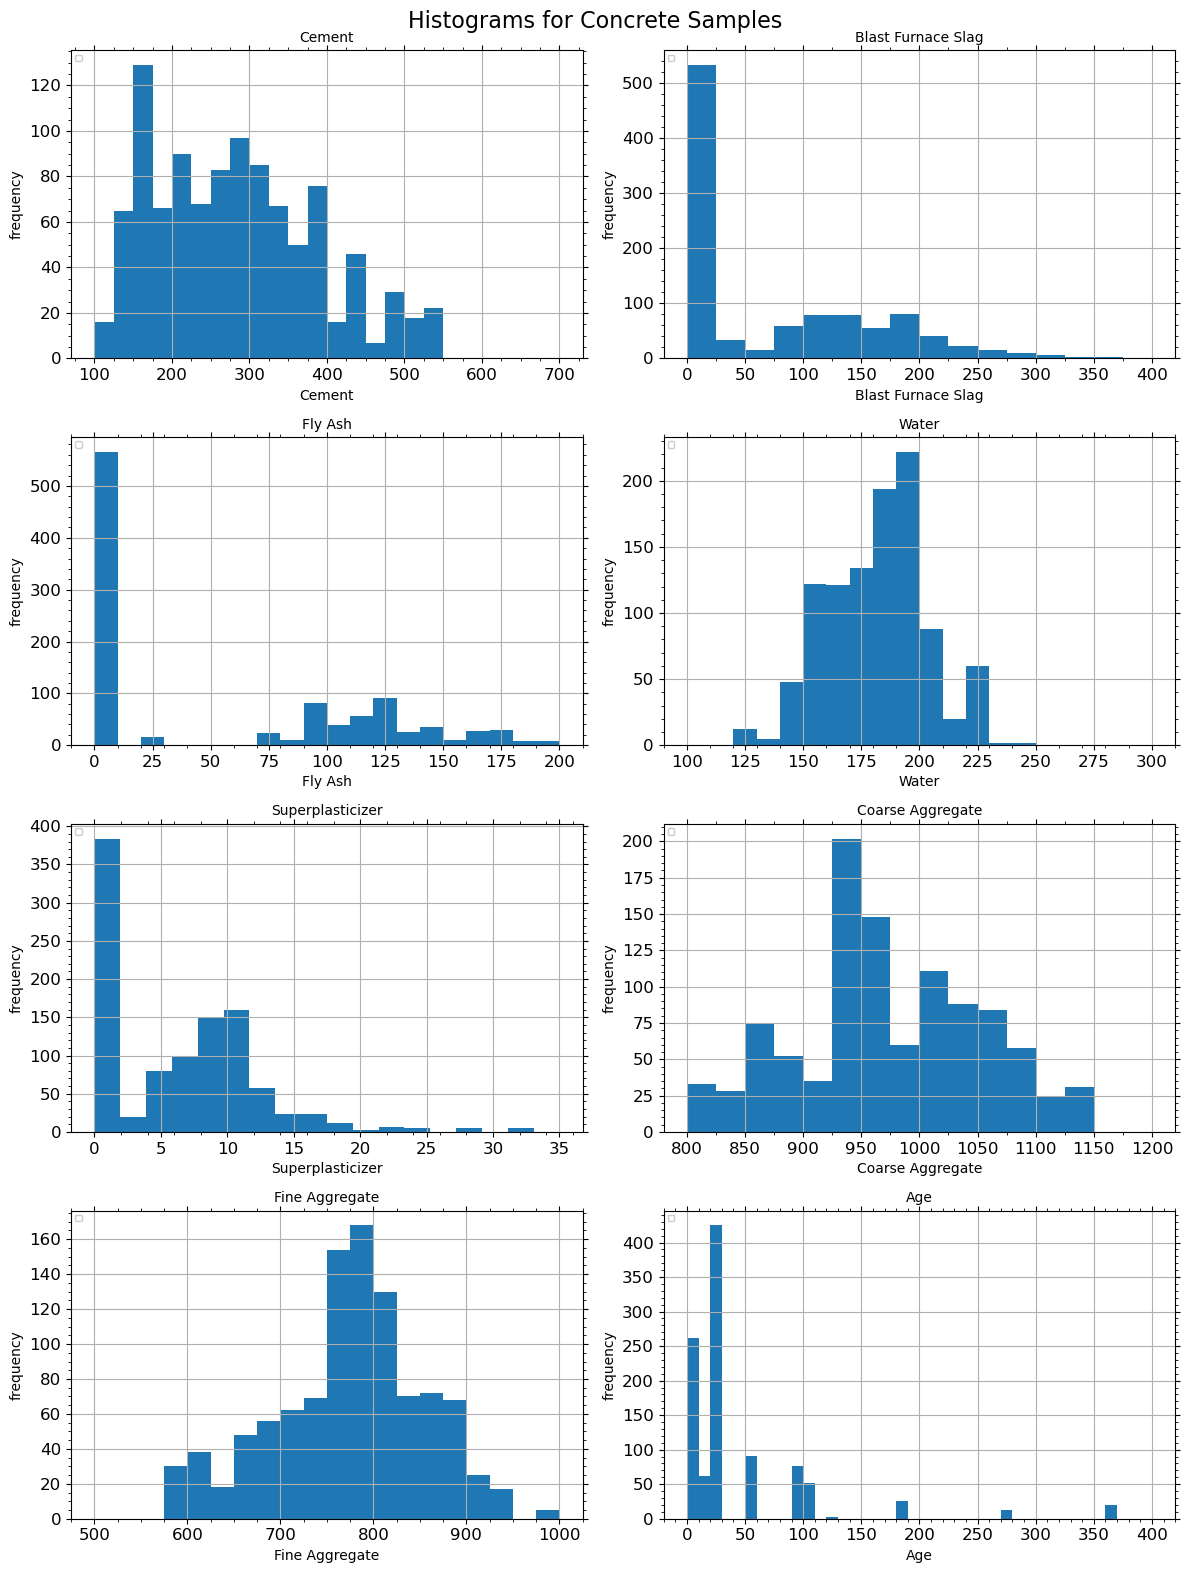

In [72]:
from matplotlib.ticker import AutoMinorLocator # This helps choose the minor ticks 


# Define figure and subplots

fig = plt.figure(figsize = (12,16)) 


# Super (?) title given over all the plots
fig.suptitle('Histograms for Concrete Samples', fontsize=16)

# 8 Types to                          
# Create a list of the names of the columns we need. I cut and pasted from the question 
list_of_columns = ["Cement", "Blast Furnace Slag", "Fly Ash", "Water", "Superplasticizer", 
                   "Coarse Aggregate", "Fine Aggregate", "Age"]

# I'm lazy so I see how much of this I can automate
for plot_index in range(8):
    column_name=list_of_columns[plot_index] # histogram of this column
    
    # note instead of fig.add_subplot(325) style we use fig.add_subplot(3,2,5) as means same thing 
    ax = fig.add_subplot(4,2,plot_index+1) # Must be the only place in python where counting starts from 1 not 0!
    ax.set_title(column_name,fontsize= 10)
    ax.grid()
    
    # The one bit I can not easily automate is the bins as the data is so different for each column.
    # So I ran it without any bins first then set these Xvalues.
    # I will use the value again to set the X ticks.
    # The y values can be automated.
    
    if column_name=="Cement":
        Xmin=100
        Xmax=700
        bin_width=25
    elif column_name=="Blast Furnace Slag":
        Xmin=0
        Xmax=400
        bin_width=25
    elif column_name=="Fly Ash":
        Xmin=0
        Xmax=200
        bin_width=10
    elif column_name=="Water":
        Xmin=100
        Xmax=300
        bin_width=10
    elif column_name=="Superplasticizer":
        Xmin=0
        Xmax=35
        bin_width=2
    elif column_name=="Coarse Aggregate":
        Xmin=800
        Xmax=1200
        bin_width=25
    elif column_name=="Fine Aggregate":
        Xmin=500
        Xmax=1000
        bin_width=25
    elif column_name=="Age":
        Xmin=0
        Xmax=400
        bin_width=10
    else:
        print("*** ERROR should never get here with column name "+column_name)

    #Now set up bins
    nbins=int(0.5+(Xmax-Xmin)/bin_width) # need to round number of bins to nearest integer
    bins = np.linspace(Xmin,Xmax,nbins+1) # last is number of edges, one more than bins 
    
    # At long last make the histogram
    ax.hist(concrete_data[column_name],bins=bins)

    
# Add labels to each axis
    ax.set_xlabel(column_name) 
    ax.set_ylabel('frequency') 

# Edit tick parameters on each axis
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1],labels[::-1],loc='upper left',fontsize = 6, framealpha = 1) 
    ax.tick_params(axis='both',labelsize = 12, direction='out',top = True, right = True, which='both')
    ax.xaxis.set_minor_locator(MultipleLocator(bin_width)) # mark out edges of bins
    ax.yaxis.set_minor_locator(AutoMinorLocator()) # Use automatic choice for y minor ticks

    
fig.tight_layout()


# Once it looks OK I save the plot and close it to stop display
plt.savefig('concrete_histograms_all.png',dpi=300)

# If you want it in another format, just change the extension in the name of the file
# I use pdf file in LaTeX so this is what I would also save it in this format
# plt.savefig('concrete_age_strength_dpi300.pdf')

# This time I won't close the plot so we can see the result on screen (or look at the file we saved).
#plt.close() 




Finished!